In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets//dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
cat_cols = ['Month','Year','Region']
dengue[cat_cols] = dengue[cat_cols].astype('category')

In [6]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1>Dengue Selected Years and Personal Investigation</h1>

In [7]:
dengue['Year'].unique()

[2016, 2017, 2018, 2019, 2020]
Categories (5, int64): [2016, 2017, 2018, 2019, 2020]

In [8]:
dengue['Fatality_Rate'] = (dengue['Dengue_Deaths'] / dengue['Dengue_Cases']) * 100

In [9]:
dengue_2016 = dengue[dengue['Year'] == 2016]
dengue_2017 = dengue[dengue['Year'] == 2017]
dengue_2018 = dengue[dengue['Year'] == 2018]
dengue_2019 = dengue[dengue['Year'] == 2019]
dengue_2020 = dengue[dengue['Year'] == 2020]

In [10]:
# dengue_yearly_Deaths = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

# sns.barplot(data=dengue_yearly_Deaths, x="Year", y="Dengue_Deaths")
# plt.gcf().set_size_inches(15,8)
# plt.show()

In [11]:
# dengue_yearly_cases = dengue.groupby('Year')['Dengue_Cases'].sum().reset_index()

# sns.barplot(data=dengue_yearly_cases, x="Year", y="Dengue_Cases")
# plt.gcf().set_size_inches(15,8)
# plt.show()


In [12]:
# dengue_yearly_fatality = dengue.groupby('Year')['Fatality_Rate'].sum().reset_index()

# sns.barplot(data=dengue_yearly_fatality, x="Year", y="Fatality_Rate")
# plt.gcf().set_size_inches(15,8)
# plt.show()

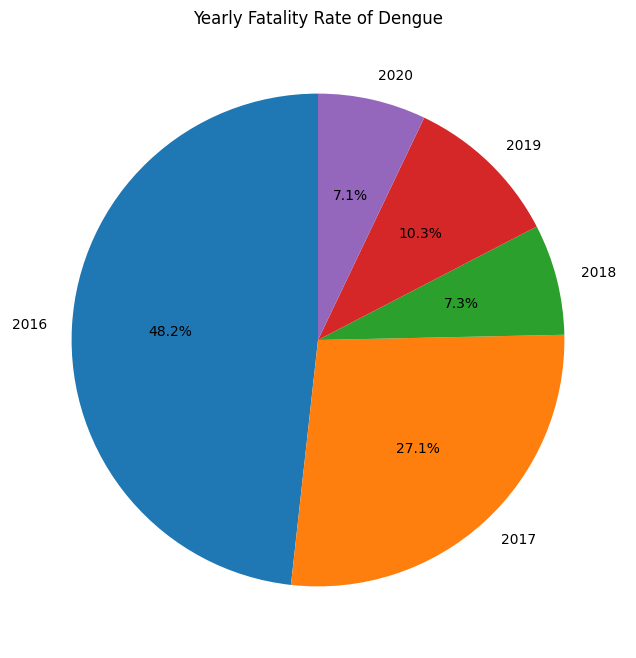

In [13]:
dengue_yearly_cases = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(dengue_yearly_cases['Dengue_Deaths'], labels=dengue_yearly_cases['Year'], autopct='%1.1f%%', startangle=90)
plt.title("Yearly Fatality Rate of Dengue")
plt.show()

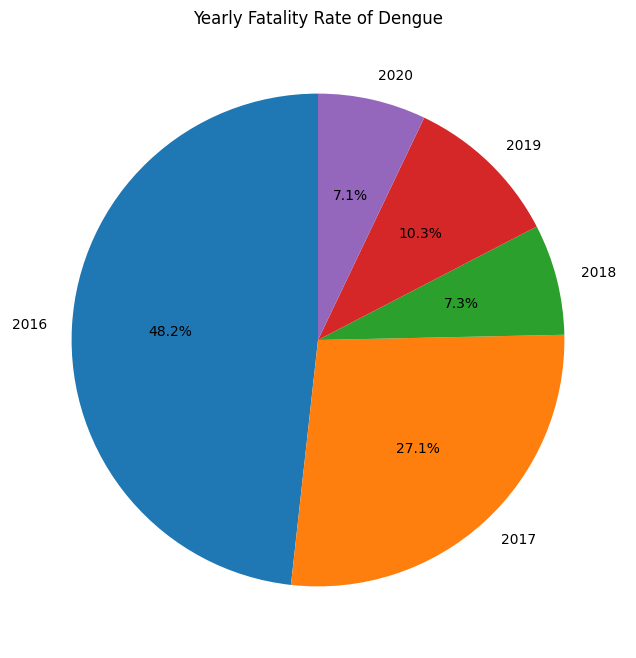

In [14]:
dengue_yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(dengue_yearly_deaths['Dengue_Deaths'], labels=dengue_yearly_deaths['Year'], autopct='%1.1f%%', startangle=90)
plt.title("Yearly Fatality Rate of Dengue")
plt.show()

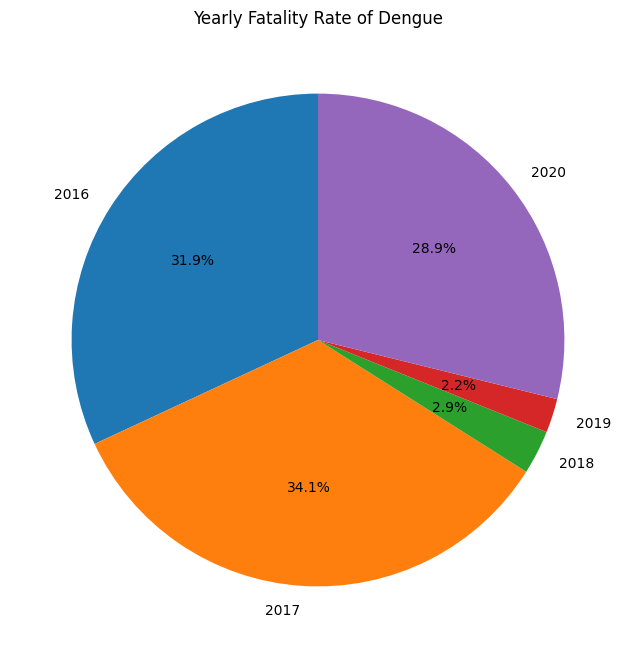

In [15]:
dengue_yearly_fatality = dengue.groupby('Year')['Fatality_Rate'].sum().reset_index()

plt.figure(figsize=(8,8))
plt.pie(dengue_yearly_fatality['Fatality_Rate'], labels=dengue_yearly_fatality['Year'], autopct='%1.1f%%', startangle=90)
plt.title("Yearly Fatality Rate of Dengue")
plt.show()


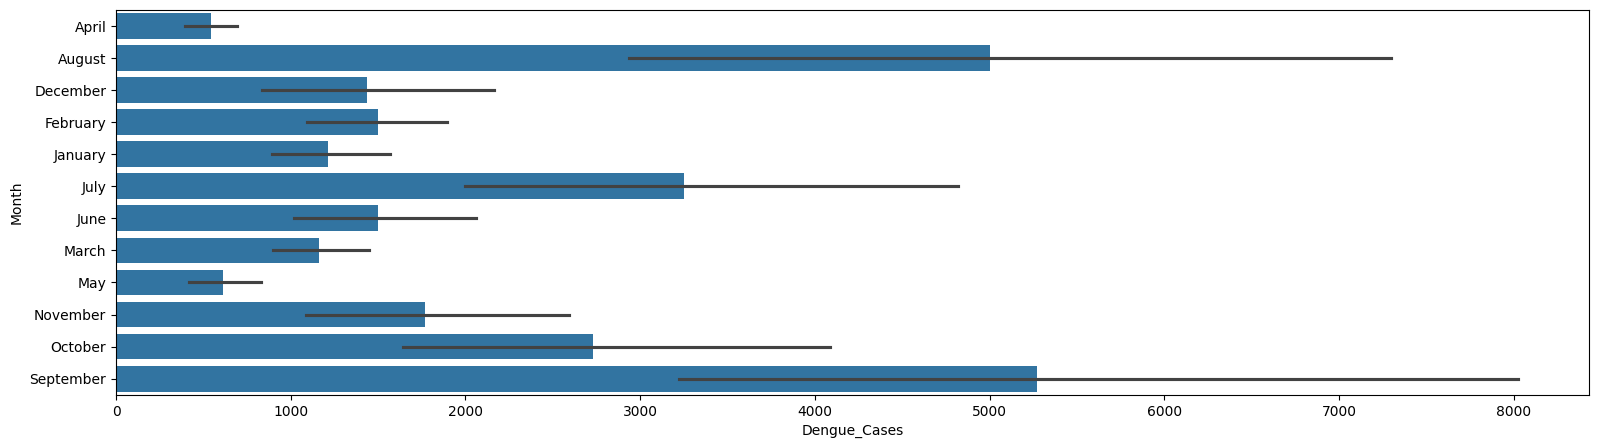

In [16]:
sns.barplot(data=dengue_2019, x="Dengue_Cases", y="Month")
plt.gcf().set_size_inches(19, 5) 
plt.show()

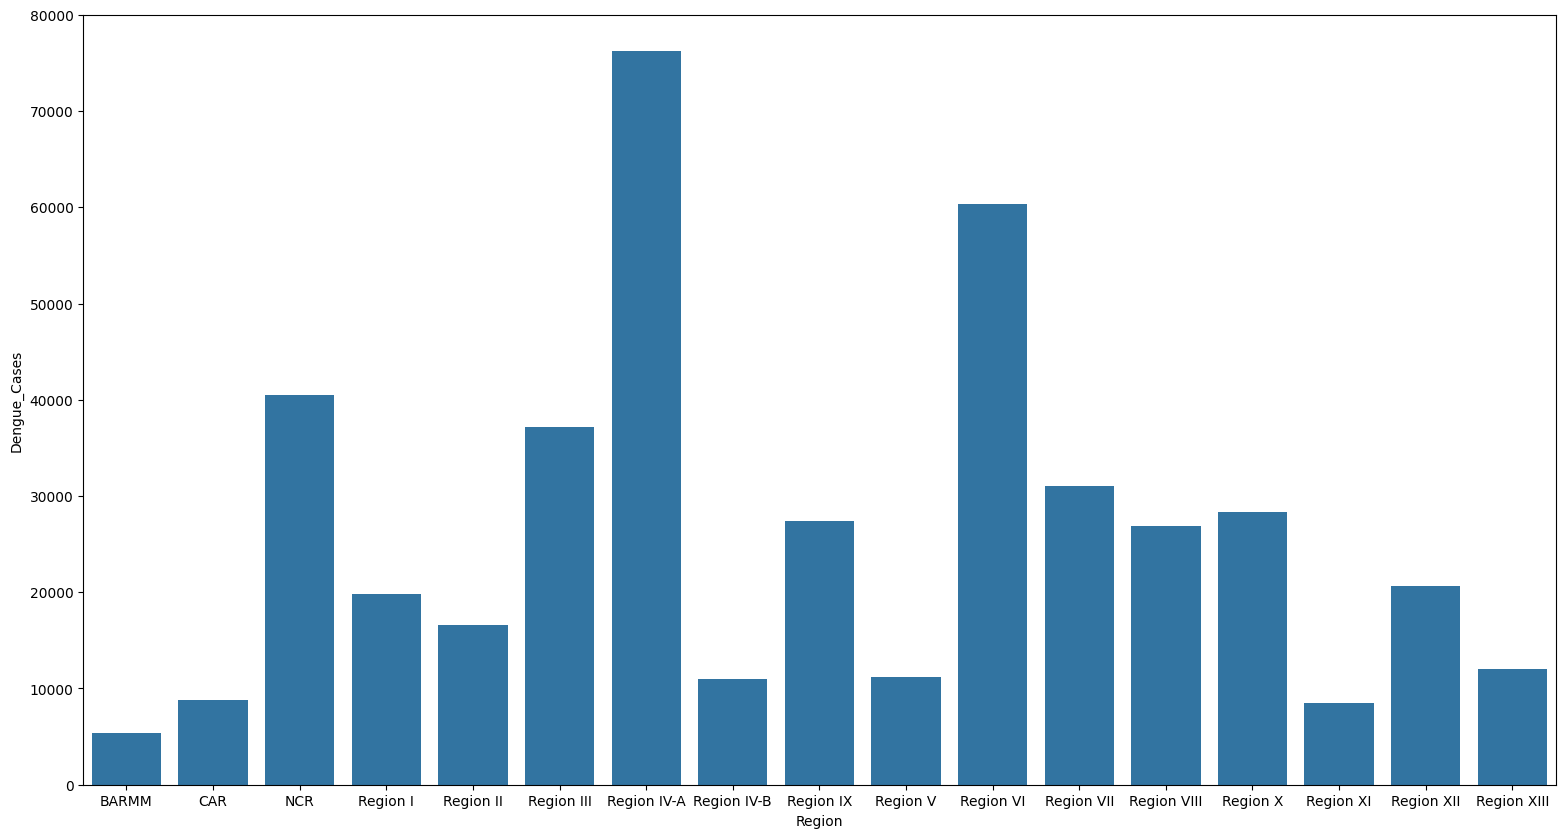

In [17]:
dengue_Regions_cases = dengue_2019.groupby('Region')['Dengue_Cases'].sum().reset_index()
sns.barplot(data=dengue_Regions_cases, x="Region", y="Dengue_Cases")
plt.gcf().set_size_inches(19, 10) 
plt.show()
# dengue_Regions_cases

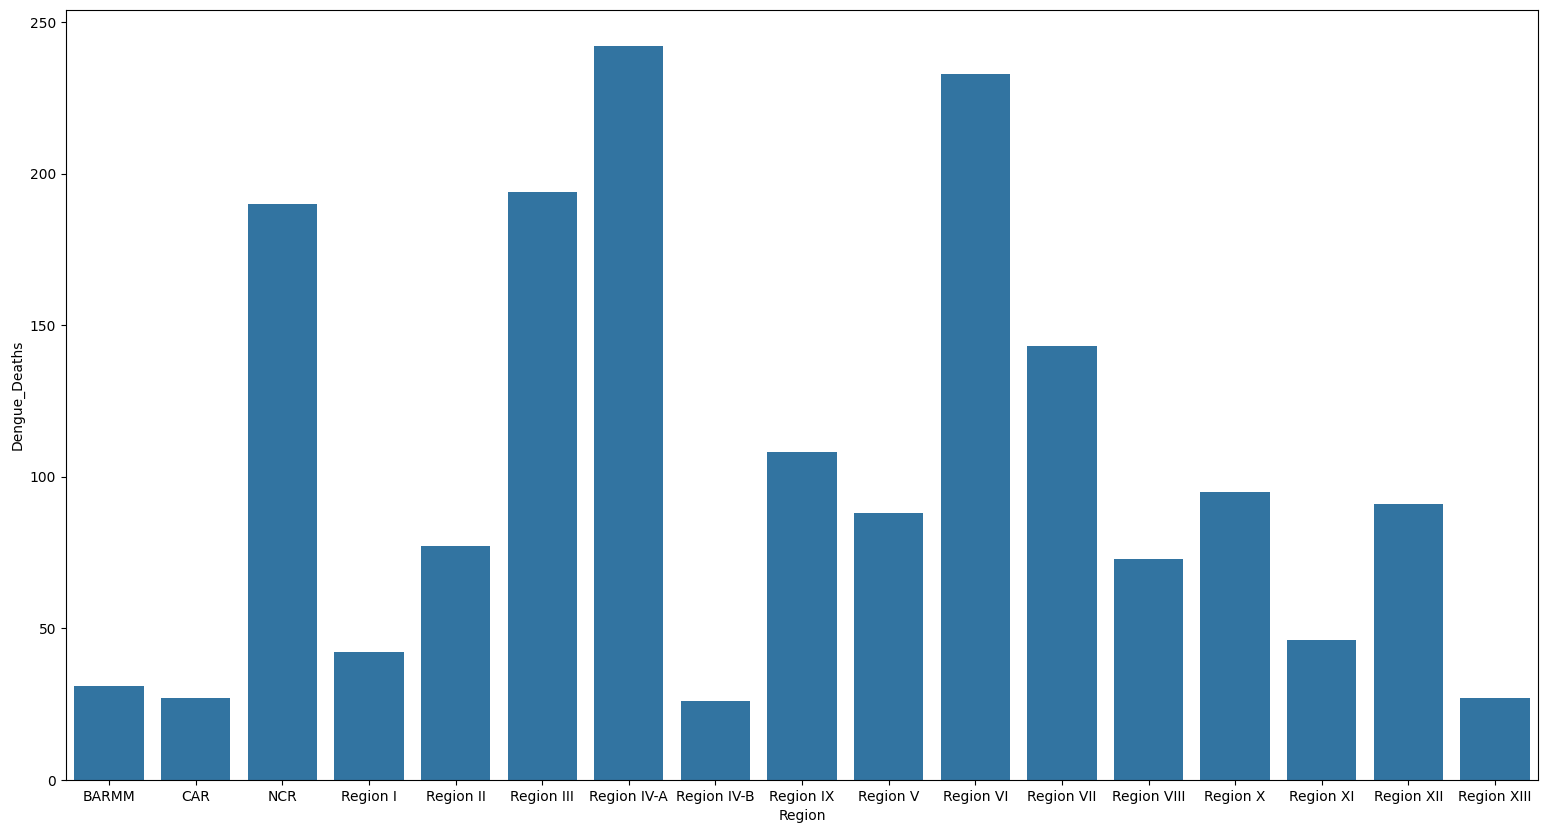

In [18]:
dengue_Regions_cases = dengue_2019.groupby('Region')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=dengue_Regions_cases, x="Region", y="Dengue_Deaths")
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1 style='font-size: 48px'>Insights:</h1>

# Year 2016

<h1>No.1 Are there Any Regions with Significantly Higher Dengue Cases Than Others?</h1>

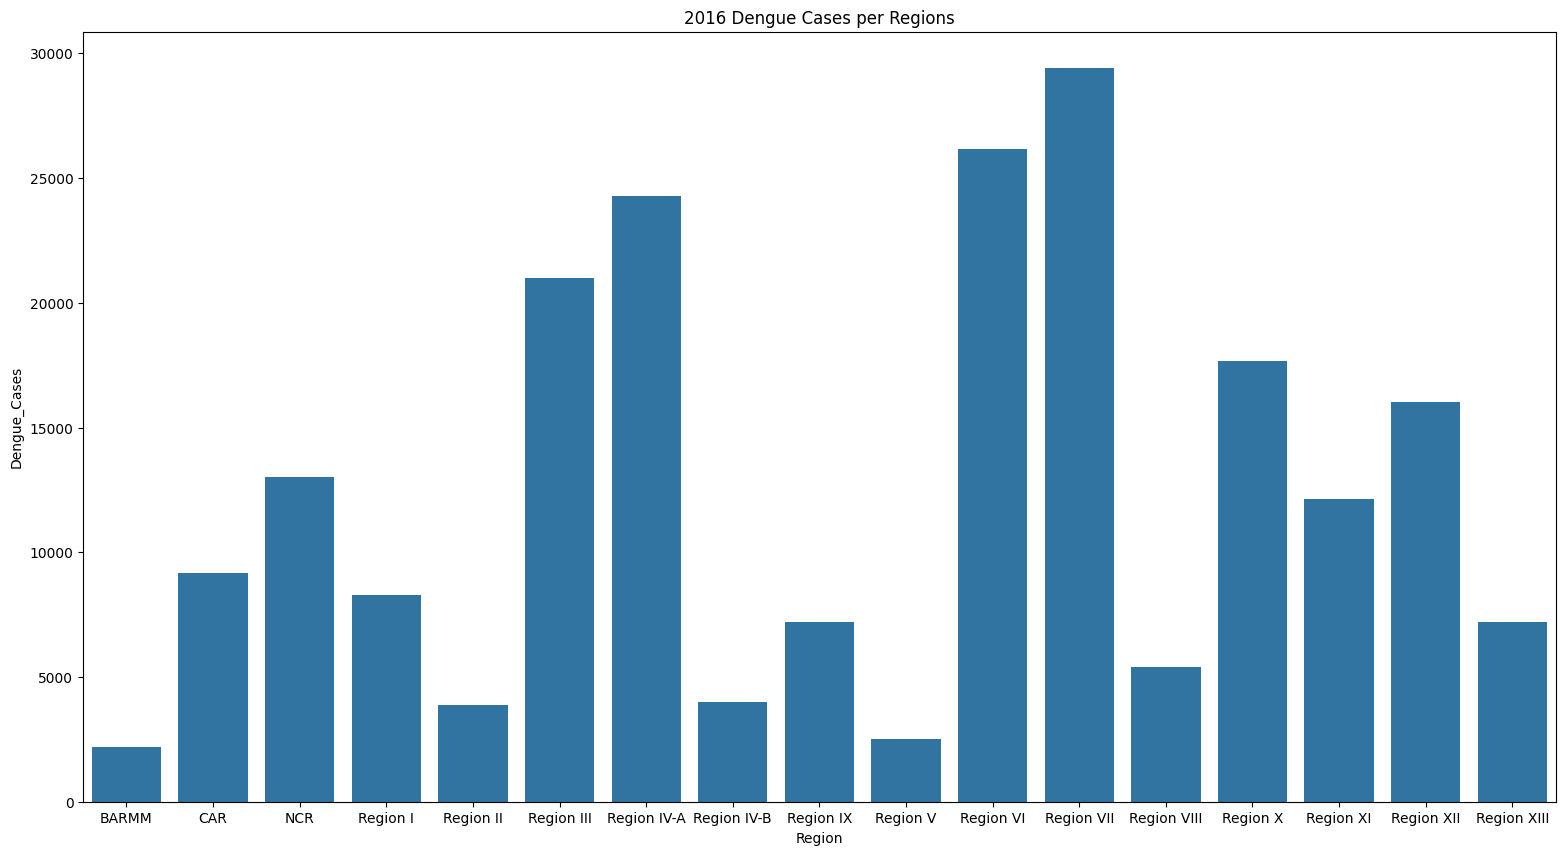

In [19]:

dengue16_Regions_cases = dengue_2016.groupby('Region')['Dengue_Cases'].sum().reset_index()

sns.barplot(data=dengue16_Regions_cases, x="Region", y="Dengue_Cases")
plt.title('2016 Dengue Cases per Regions')
plt.gcf().set_size_inches(19, 10) 
plt.show()


<h1>Dengue Cases in 2016 by Region</h1>
    <p><strong>Region VII:</strong> 29,395 cases, contributing 13.53% of total dengue cases.</p>
    <p><strong>Region VI:</strong> 26,170 cases, contributing 12.94% of total dengue cases.</p>
    <p><strong>Region IV-A:</strong> 24,282 cases, contributing 11.53% of total dengue cases.</p>
    <p><strong>Region III:</strong> 20,989 cases, contributing 9.96% of total dengue cases.</p>
    <p><strong>NCR:</strong> 13,002 cases, contributing 6.18% of total dengue cases.</p>
    <p><strong>Region XI:</strong> 12,137 cases, contributing 5.73% of total dengue cases.</p>
    <p><strong>Region XIII:</strong> 7,215 cases, contributing 3.43% of total dengue cases.</p>
    <p><strong>Region IX:</strong> 7,215 cases, contributing 3.43% of total dengue cases.</p>
    <p><strong>Region I:</strong> 8,281 cases, contributing 3.94% of total dengue cases.</p>
    <p><strong>Region XII:</strong> 16,013 cases, contributing 7.58% of total dengue cases.</p>
    <p><strong>Region II:</strong> 3,891 cases, contributing 1.85% of total dengue cases.</p>
    <p><strong>Region V:</strong> 2,532 cases, contributing 1.19% of total dengue cases.</p>
    <p><strong>CAR:</strong> 9,164 cases, contributing 4.31% of total dengue cases.</p>
    <p><strong>BARMM:</strong> 2,191 cases, contributing 1.03% of total dengue cases.</p>


<h1>No.2 Are there Any Regions with Significantly Higher Dengue Deaths Than Others?</h1>

In [20]:
dengue_fatality_overtheyears = dengue.groupby('Year')['Fatality_Rate'].sum().reset_index()

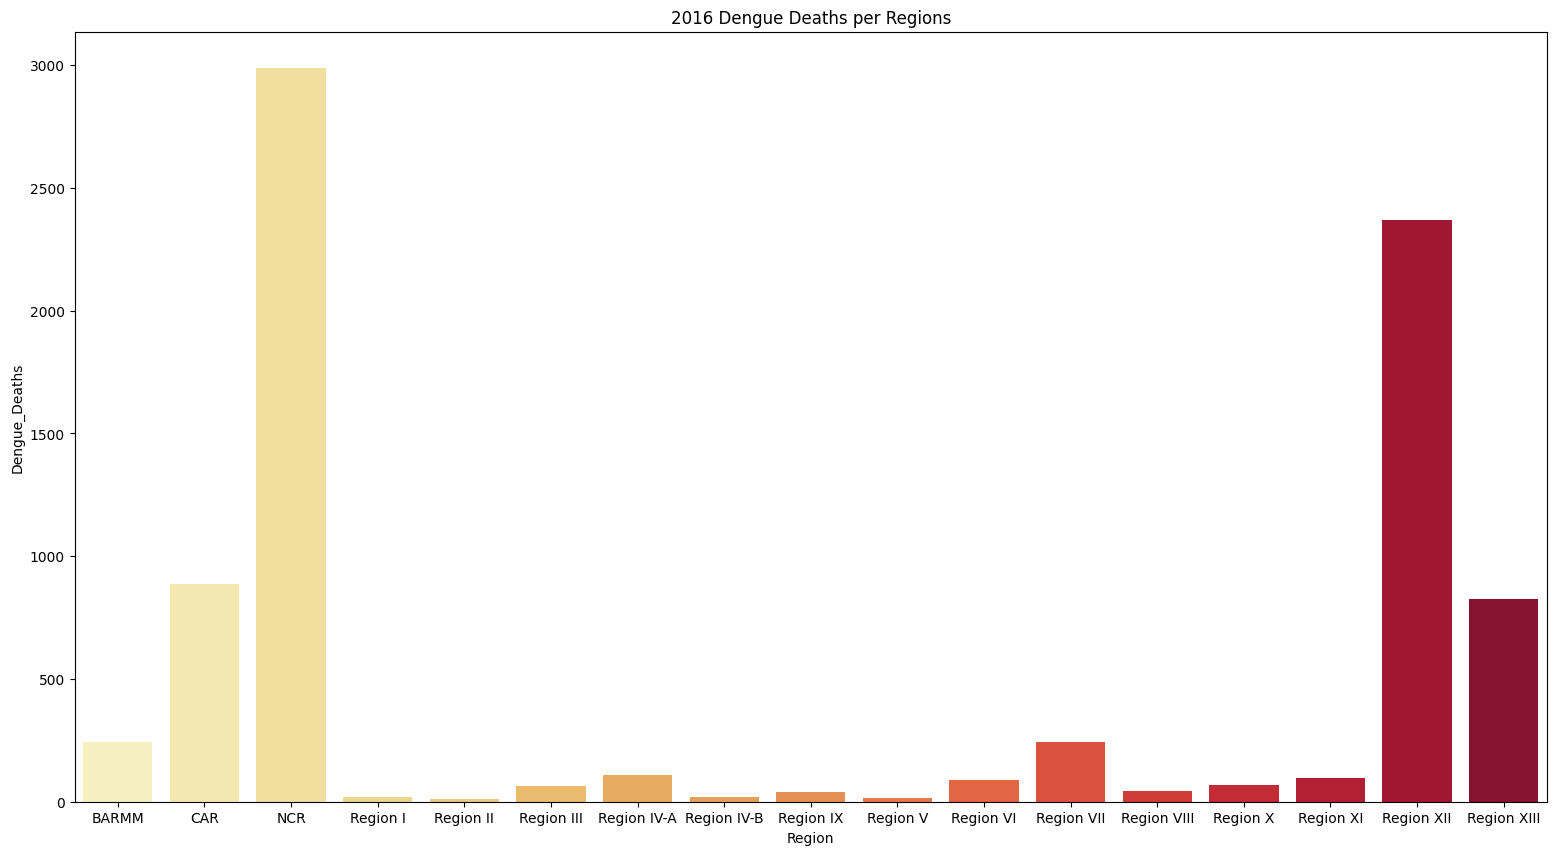

In [21]:
dengue16_Regions_deaths = dengue_2016.groupby('Region')['Dengue_Deaths'].sum().reset_index()
sns.barplot(data=dengue16_Regions_deaths, x="Region", y="Dengue_Deaths",palette='YlOrRd')
plt.title('2016 Dengue Deaths per Regions')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths in 2016 by Region</h1>
    <p><strong>Region NCR:</strong> 2,987 deaths, contributing 16.91% of total dengue deaths.</p>
    <p><strong>Region XII:</strong> 2,369 deaths, contributing 13.37% of total dengue deaths.</p>
    <p><strong>Region XIII:</strong> 824 deaths, contributing 4.64% of total dengue deaths.</p>
    <p><strong>Region BARMM:</strong> 243 deaths, contributing 1.37% of total dengue deaths.</p>
    <p><strong>Region VII:</strong> 243 deaths, contributing 1.37% of total dengue deaths.</p>
    <p><strong>Region CAR:</strong> 888 deaths, contributing 5.03% of total dengue deaths.</p>
    <p><strong>Region I:</strong> 21 deaths, contributing 0.12% of total dengue deaths.</p>
    <p><strong>Region II:</strong> 11 deaths, contributing 0.06% of total dengue deaths.</p>
    <p><strong>Region III:</strong> 65 deaths, contributing 0.37% of total dengue deaths.</p>
    <p><strong>Region IV-A:</strong> 108 deaths, contributing 0.61% of total dengue deaths.</p>
    <p><strong>Region IV-B:</strong> 18 deaths, contributing 0.10% of total dengue deaths.</p>
    <p><strong>Region IX:</strong> 41 deaths, contributing 0.23% of total dengue deaths.</p>
    <p><strong>Region V:</strong> 16 deaths, contributing 0.09% of total dengue deaths.</p>
    <p><strong>Region VI:</strong> 87 deaths, contributing 0.49% of total dengue deaths.</p>
    <p><strong>Region VIII:</strong> 42 deaths, contributing 0.24% of total dengue deaths.</p>
    <p><strong>Region X:</strong> 69 deaths, contributing 0.39% of total dengue deaths.</p>
    <p><strong>Region XI:</strong> 95 deaths, contributing 0.54% of total dengue deaths.</p>


<h1>No.3 Year-to-Year Comparison of Case Fatality</h1>

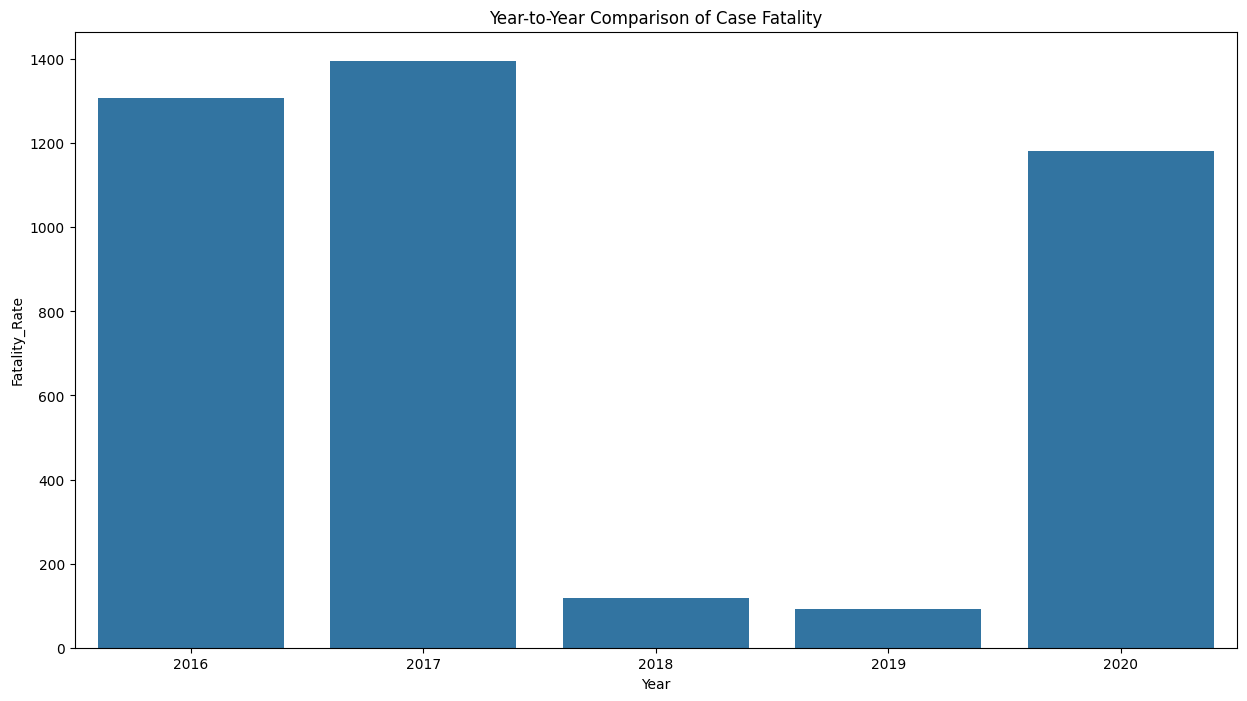

In [22]:
sns.barplot(data=dengue_fatality_overtheyears,x='Year',y='Fatality_Rate')
plt.title('Year-to-Year Comparison of Case Fatality')
plt.gcf().set_size_inches(15,8)
plt.show()

<h1>Dengue Fatality Rate Insights</h1>
        <li><strong>2016:</strong> The Fatality Rate was significantly high at <strong>1306.97%</strong></li>
        <li><strong>2017:</strong> The Fatality Rate increased slightly to <strong>1395.45%</strong></li>
        <li><strong>2018:</strong> A dramatic decrease in the Fatality Rate to <strong>117.98%</strong></li>
        <li><strong>2019:</strong> The Fatality Rate dropped further to <strong>91.57%</strong></li>
        <li><strong>2020:</strong> The Fatality Rate spiked back to <strong>1181.25%</strong></li>

<h1>No.4 Do Fatality Rates Vary Significantly Across Regions?</h1>

In [23]:
dengue_fatality_overtheRegions = dengue.groupby('Region')['Fatality_Rate'].sum().reset_index()

In [24]:
# sns.barplot(data=dengue_fatality_overtheRegions,x='Region',y='Fatality_Rate')
# plt.title('Comparison of Case Fatality per Region')
# plt.gcf().set_size_inches(15,8)
# plt.show()

<h1>Dengue Fatality Rate by Region</h1>
<p><strong>BARMM:</strong> Fatality rate: 394.41%</p>
<p><strong>CAR:</strong> Fatality rate: 418.40%</p>
<p><strong>NCR:</strong> Fatality rate: 564.76%</p>
<p><strong>Region I:</strong> Fatality rate: 23.28%</p>
<p><strong>Region II:</strong> Fatality rate: 25.87%</p>
<p><strong>Region III:</strong> Fatality rate: 19.71%</p>
<p><strong>Region IV-A:</strong> Fatality rate: 27.78%</p>
<p><strong>Region IV-B:</strong> Fatality rate: 27.55%</p>
<p><strong>Region IX:</strong> Fatality rate: 300.96%</p>
<p><strong>Region V:</strong> Fatality rate: 58.47%</p>
<p><strong>Region VI:</strong> Fatality rate: 264.29%</p>
<p><strong>Region VII:</strong> Fatality rate: 199.04%</p>
<p><strong>Region VIII:</strong> Fatality rate: 267.99%</p>
<p><strong>Region X:</strong> Fatality rate: 236.02%</p>
<p><strong>Region XI:</strong> Fatality rate: 229.00%</p>
<p><strong>Region XII:</strong> Fatality rate: 473.54%</p>
<p><strong>Region XIII:</strong> Fatality rate: 562.14%</p>


<h1>Total Cases & Deaths per Year</h1>

In [25]:
tot_case_death_year = dengue.groupby("Year")[["Dengue_Cases", "Dengue_Deaths"]].sum()

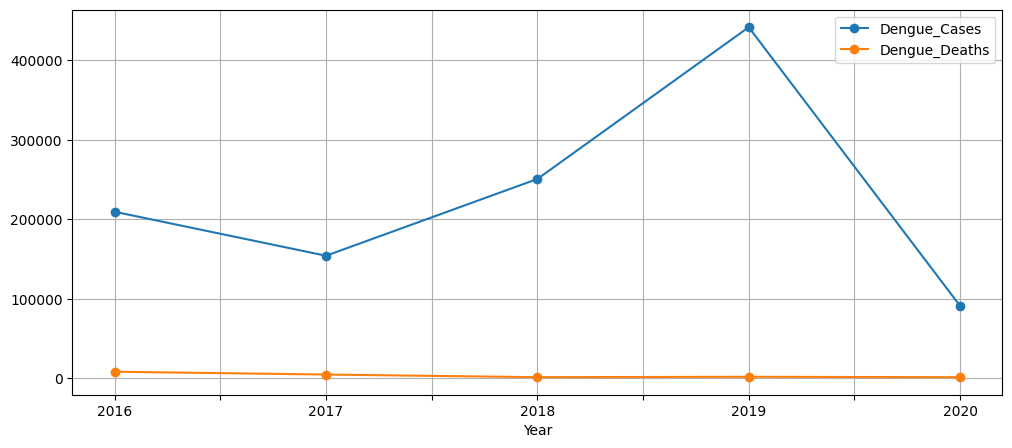

In [26]:
tot_case_death_year.plot(kind='line', marker='o', grid=True)
plt.gcf().set_size_inches(12,5)
plt.show()

<h1>Dengue Deaths by Year</h1>
<p><strong>2016:</strong> 8,127 deaths, contributing 36.25% of total dengue deaths.</p>
<p><strong>2017:</strong> 4,563 deaths, contributing 20.36% of total dengue deaths.</p>
<p><strong>2018:</strong> 1,226 deaths, contributing 5.47% of total dengue deaths.</p>
<p><strong>2019:</strong> 1,733 deaths, contributing 7.73% of total dengue deaths.</p>
<p><strong>2020:</strong> 1,195 deaths, contributing 5.33% of total dengue deaths.</p>

<h1>Dengue Cases by Year</h1>
<p><strong>2016:</strong> 209,544 cases, contributing 21.82% of total dengue cases.</p>
<p><strong>2017:</strong> 154,155 cases, contributing 16.06% of total dengue cases.</p>
<p><strong>2018:</strong> 250,783 cases, contributing 26.14% of total dengue cases.</p>
<p><strong>2019:</strong> 441,902 cases, contributing 46.07% of total dengue cases.</p>
<p><strong>2020:</strong> 91,041 cases, contributing 9.49% of total dengue cases.</p>


<h1>Total Cases & Deaths per Region</h1>

In [27]:
tot_case_death_region = dengue.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum()

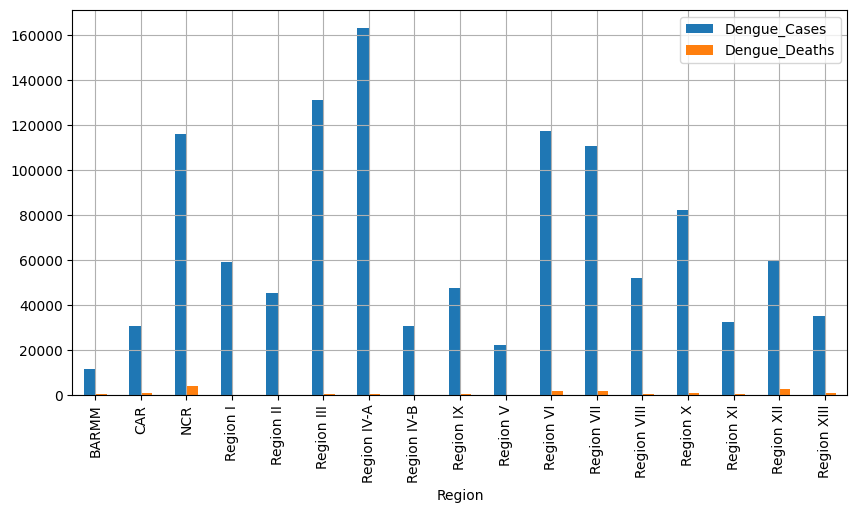

In [28]:
tot_case_death_region.plot(kind='bar', grid=True)
plt.gcf().set_size_inches(10,5)
plt.show()

<h1>Dengue Cases per Month (Sorted from Highest to Lowest)</h1>
<p><strong>August:</strong> <strong>25039</strong> cases, contributing <strong>19.48%</strong> of the total cases.</p>
<p><strong>July:</strong> <strong>18340</strong> cases, contributing <strong>14.27%</strong> of the total cases.</p>
<p><strong>September:</strong> <strong>17753</strong> cases, contributing <strong>13.79%</strong> of the total cases.</p>
<p><strong>October:</strong> <strong>15259</strong> cases, contributing <strong>11.87%</strong> of the total cases.</p>
<p><strong>January:</strong> <strong>15623</strong> cases, contributing <strong>12.12%</strong> of the total cases.</p>
<p><strong>December:</strong> <strong>13235</strong> cases, contributing <strong>10.28%</strong> of the total cases.</p>
<p><strong>November:</strong> <strong>12553</strong> cases, contributing <strong>9.75%</strong> of the total cases.</p>
<p><strong>February:</strong> <strong>9872</strong> cases, contributing <strong>7.68%</strong> of the total cases.</p>
<p><strong>March:</strong> <strong>7696</strong> cases, contributing <strong>5.98%</strong> of the total cases.</p>
<p><strong>April:</strong> <strong>6343</strong> cases, contributing <strong>4.91%</strong> of the total cases.</p>
<p><strong>June:</strong> <strong>7589</strong> cases, contributing <strong>5.89%</strong> of the total cases.</p>
<p><strong>May:</strong> <strong>4853</strong> cases, contributing <strong>3.77%</strong> of the total cases.</p>


<h1 style='font-size: 64px'>2017 Exploration</h1>
<h1>The unusually high fatality rate in 2017 prompted further analysis.</h1>

In [29]:
# dengue_2017

<h1>How do Dengue cases fluctuate across different months in 2017, and are there any noticeable seasonal trends in the occurrence of Dengue cases?</h1>

<h1>Months</h1>

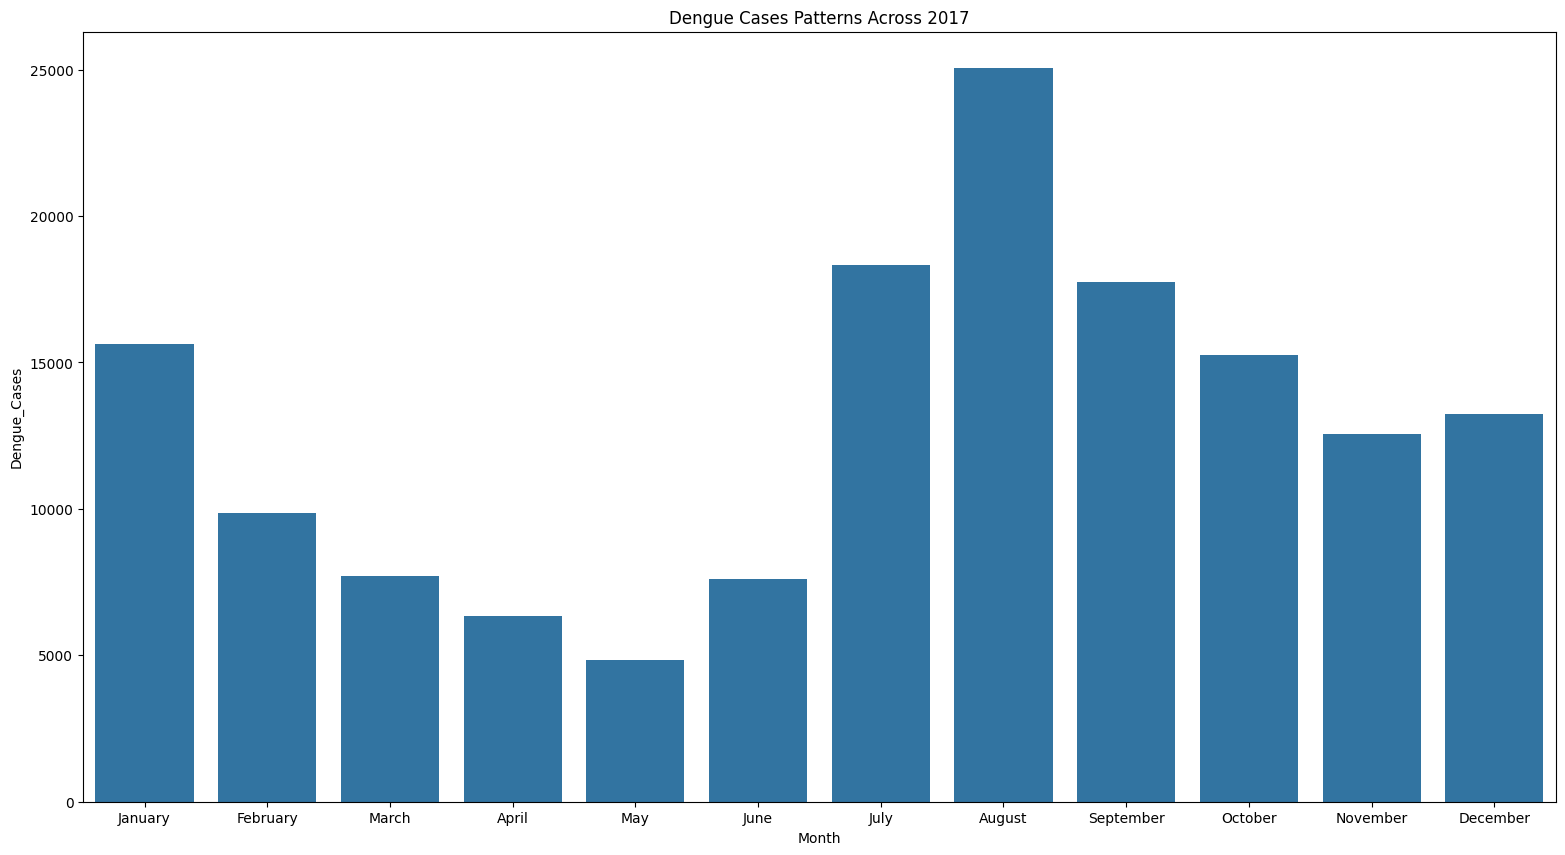

In [30]:
dengue17_Months_cases = dengue_2017.groupby('Month')['Dengue_Cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue17_Months_cases['Month'] = pd.Categorical(dengue17_Months_cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue17_Months_cases, x="Month", y="Dengue_Cases")
plt.title('Dengue Cases Patterns Across 2017')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Cases by Month</h1>
<p><strong>August:</strong> 25,039 cases, contributing 16.16% of total dengue cases.</p>
<p><strong>October:</strong> 15,259 cases, contributing 9.81% of total dengue cases.</p>
<p><strong>January:</strong> 15,623 cases, contributing 10.03% of total dengue cases.</p>
<p><strong>September:</strong> 17,753 cases, contributing 11.39% of total dengue cases.</p>
<p><strong>December:</strong> 13,235 cases, contributing 8.49% of total dengue cases.</p>
<p><strong>November:</strong> 12,553 cases, contributing 8.08% of total dengue cases.</p>
<p><strong>July:</strong> 18,340 cases, contributing 11.75% of total dengue cases.</p>
<p><strong>February:</strong> 9,872 cases, contributing 6.35% of total dengue cases.</p>
<p><strong>March:</strong> 7,696 cases, contributing 4.94% of total dengue cases.</p>
<p><strong>June:</strong> 7,589 cases, contributing 4.89% of total dengue cases.</p>
<p><strong>April:</strong> 6,343 cases, contributing 4.09% of total dengue cases.</p>
<p><strong>May:</strong> 4,853 cases, contributing 3.13% of total dengue cases.</p>


<h1>Dengue Death Patterns Across 2017</h1>

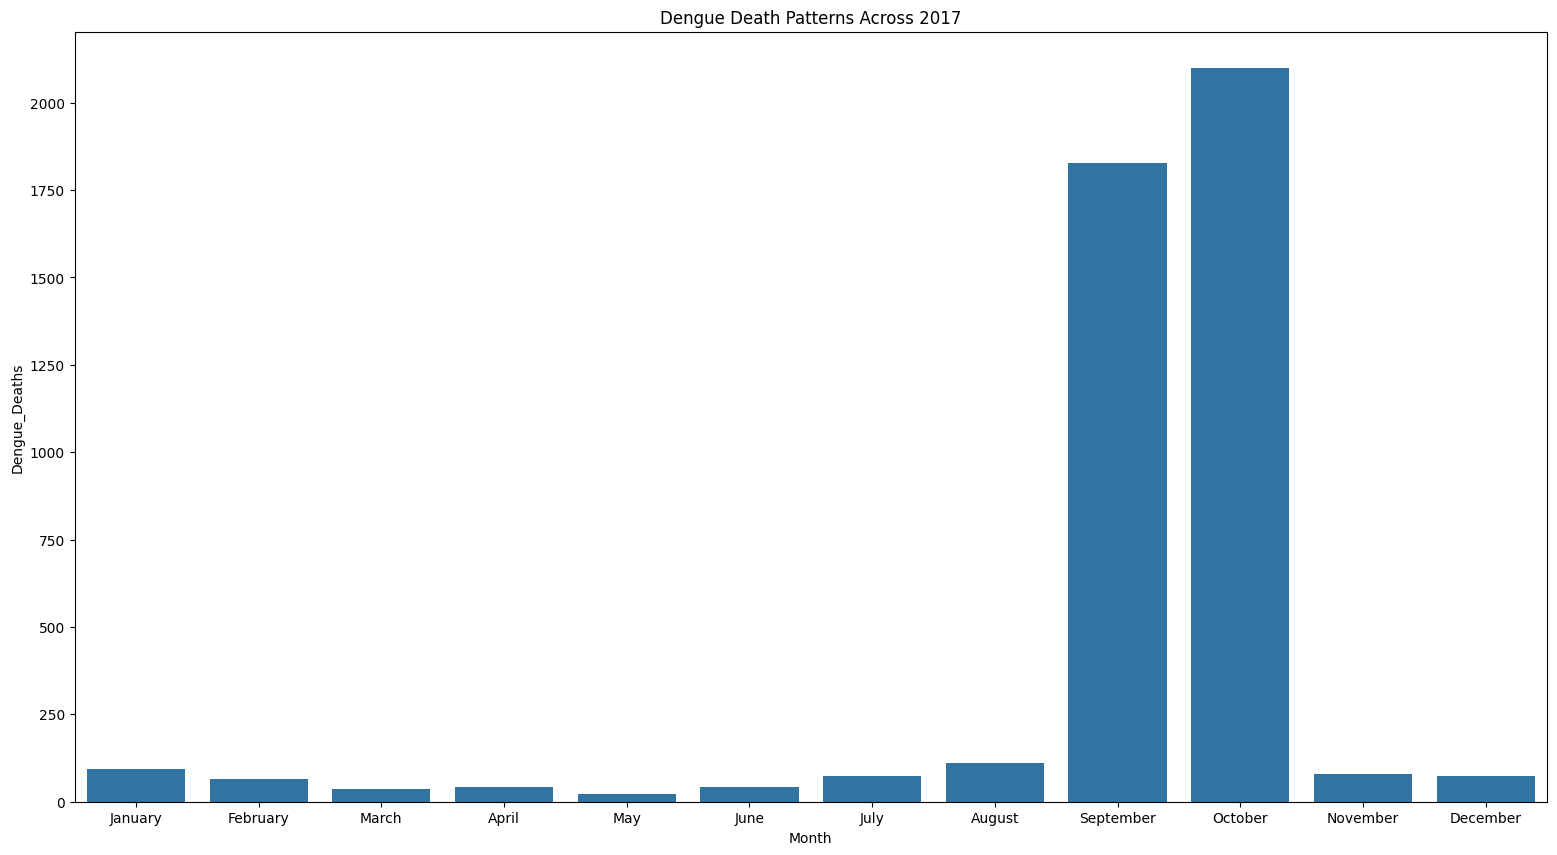

In [31]:
dengue17_Months_death = dengue_2017.groupby('Month')['Dengue_Deaths'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue17_Months_death['Month'] = pd.Categorical(dengue17_Months_death['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue17_Months_death, x="Month", y="Dengue_Deaths")
plt.title('Dengue Death Patterns Across 2017')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths by Month</h1>
<p><strong>October:</strong> 2,098 deaths, contributing 55.56% of total dengue deaths.</p>
<p><strong>September:</strong> 1,826 deaths, contributing 48.21% of total dengue deaths.</p>
<p><strong>August:</strong> 111 deaths, contributing 2.92% of total dengue deaths.</p>
<p><strong>January:</strong> 95 deaths, contributing 2.48% of total dengue deaths.</p>
<p><strong>November:</strong> 78 deaths, contributing 2.04% of total dengue deaths.</p>
<p><strong>December:</strong> 73 deaths, contributing 1.92% of total dengue deaths.</p>
<p><strong>July:</strong> 74 deaths, contributing 1.96% of total dengue deaths.</p>
<p><strong>February:</strong> 64 deaths, contributing 1.68% of total dengue deaths.</p>
<p><strong>June:</strong> 42 deaths, contributing 1.10% of total dengue deaths.</p>
<p><strong>April:</strong> 43 deaths, contributing 1.13% of total dengue deaths.</p>
<p><strong>March:</strong> 36 deaths, contributing 0.94% of total dengue deaths.</p>
<p><strong>May:</strong> 23 deaths, contributing 0.60% of total dengue deaths.</p>


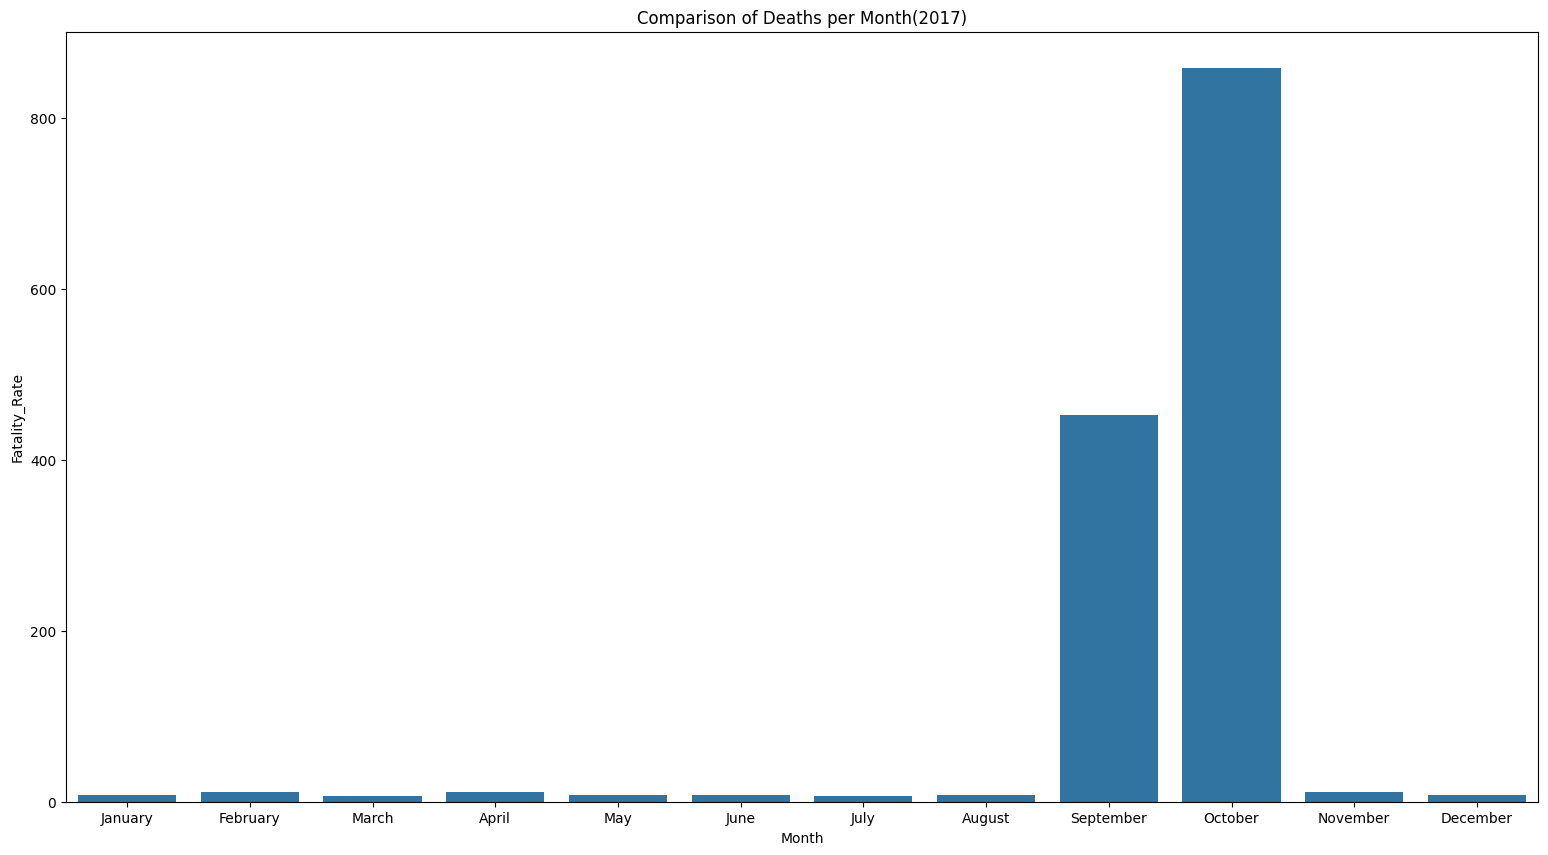

In [32]:
dengue17_Months_Fatality = dengue_2017.groupby('Month')['Fatality_Rate'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue17_Months_Fatality['Month'] = pd.Categorical(dengue17_Months_Fatality['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue17_Months_Fatality, x="Month", y="Fatality_Rate")
plt.title('Comparison of Deaths per Month(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Fatality Rate by Month</h1>
<p><strong>October:</strong> 857.79%, contributing 28.88% of total fatality rates.</p>
<p><strong>September:</strong> 451.99%, contributing 14.94% of total fatality rates.</p>
<p><strong>February:</strong> 11.66%, contributing 0.38% of total fatality rates.</p>
<p><strong>November:</strong> 11.07%, contributing 0.36% of total fatality rates.</p>
<p><strong>April:</strong> 10.99%, contributing 0.36% of total fatality rates.</p>
<p><strong>December:</strong> 8.27%, contributing 0.27% of total fatality rates.</p>
<p><strong>January:</strong> 8.05%, contributing 0.26% of total fatality rates.</p>
<p><strong>June:</strong> 7.66%, contributing 0.25% of total fatality rates.</p>
<p><strong>May:</strong> 7.65%, contributing 0.25% of total fatality rates.</p>
<p><strong>August:</strong> 7.60%, contributing 0.25% of total fatality rates.</p>
<p><strong>July:</strong> 6.55%, contributing 0.22% of total fatality rates.</p>
<p><strong>March:</strong> 6.17%, contributing 0.21% of total fatality rates.</p>


<h1>2017 Regions</h1>

<h1>Dengue Case Patterns in Different Regions</h1>

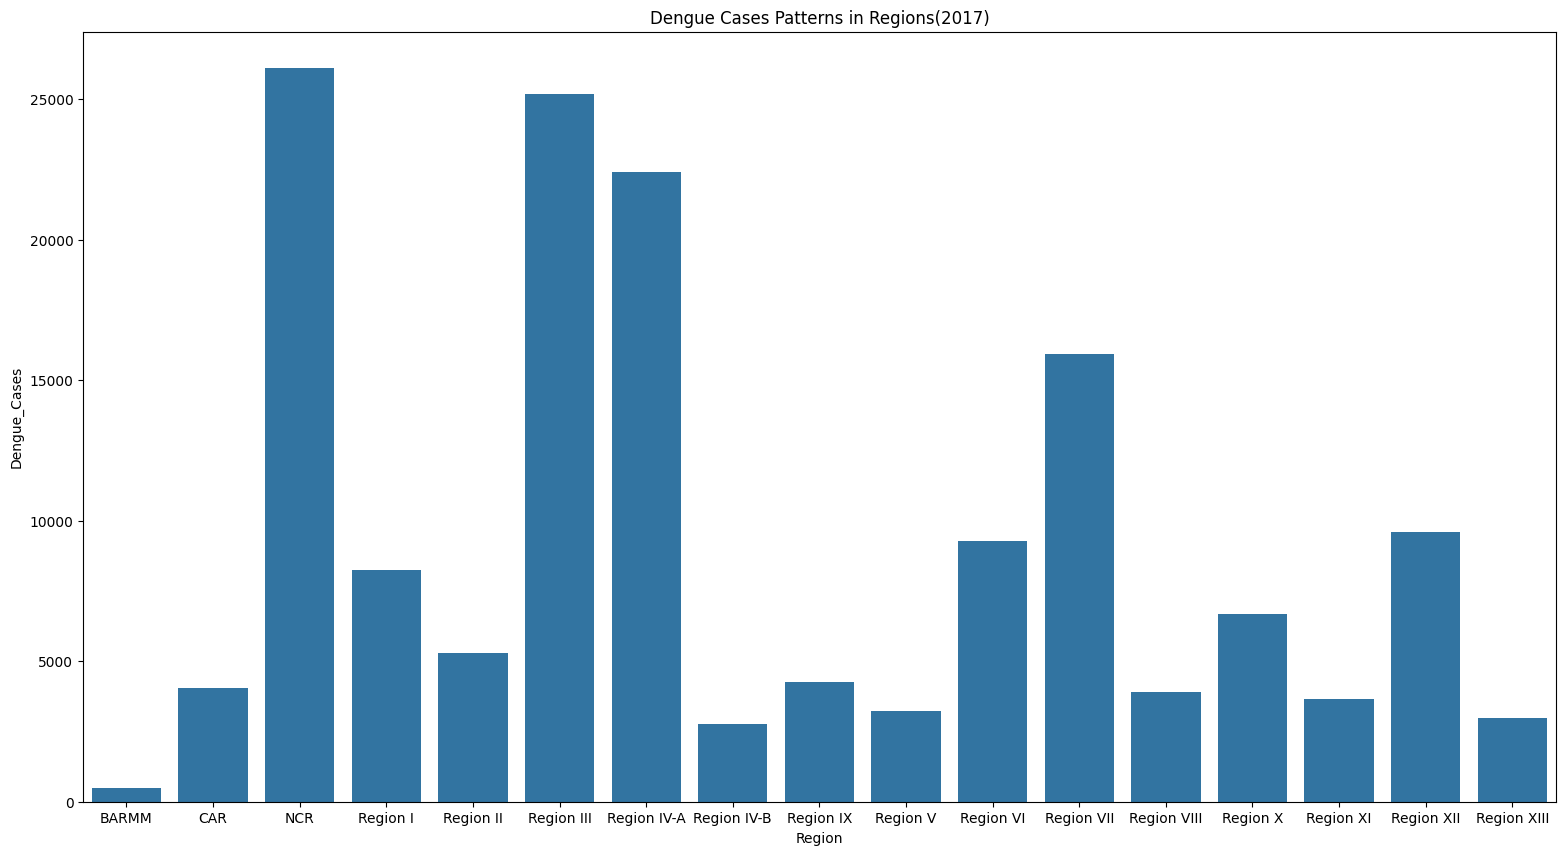

In [33]:
dengue17_Regions_cases = dengue_2017.groupby('Region')['Dengue_Cases'].sum().reset_index()

sns.barplot(data=dengue17_Regions_cases, x="Region", y="Dengue_Cases")
plt.title('Dengue Cases Patterns in Regions(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Cases by Region</h1>
<p><strong>NCR:</strong> 26,103 cases, contributing 14.89% of total dengue cases.</p>
<p><strong>Region III:</strong> 25,200 cases, contributing 14.49% of total dengue cases.</p>
<p><strong>Region IV-A:</strong> 22,421 cases, contributing 12.86% of total dengue cases.</p>
<p><strong>Region VII:</strong> 15,940 cases, contributing 9.14% of total dengue cases.</p>
<p><strong>Region I:</strong> 8,236 cases, contributing 4.74% of total dengue cases.</p>
<p><strong>Region VI:</strong> 9,283 cases, contributing 5.32% of total dengue cases.</p>
<p><strong>Region XII:</strong> 9,613 cases, contributing 5.53% of total dengue cases.</p>
<p><strong>Region X:</strong> 6,679 cases, contributing 3.83% of total dengue cases.</p>
<p><strong>Region II:</strong> 5,310 cases, contributing 3.06% of total dengue cases.</p>
<p><strong>Region XIII:</strong> 2,988 cases, contributing 1.72% of total dengue cases.</p>
<p><strong>Region IX:</strong> 4,274 cases, contributing 2.47% of total dengue cases.</p>
<p><strong>Region VIII:</strong> 3,916 cases, contributing 2.25% of total dengue cases.</p>
<p><strong>Region V:</strong> 3,225 cases, contributing 1.86% of total dengue cases.</p>
<p><strong>Region XI:</strong> 3,667 cases, contributing 2.12% of total dengue cases.</p>
<p><strong>Region IV-B:</strong> 2,770 cases, contributing 1.59% of total dengue cases.</p>
<p><strong>CAR:</strong> 4,045 cases, contributing 2.34% of total dengue cases.</p>
<p><strong>BARMM:</strong> 485 cases, contributing 0.28% of total dengue cases.</p>


<h1>Dengue Death Patterns in Different Regions</h1>

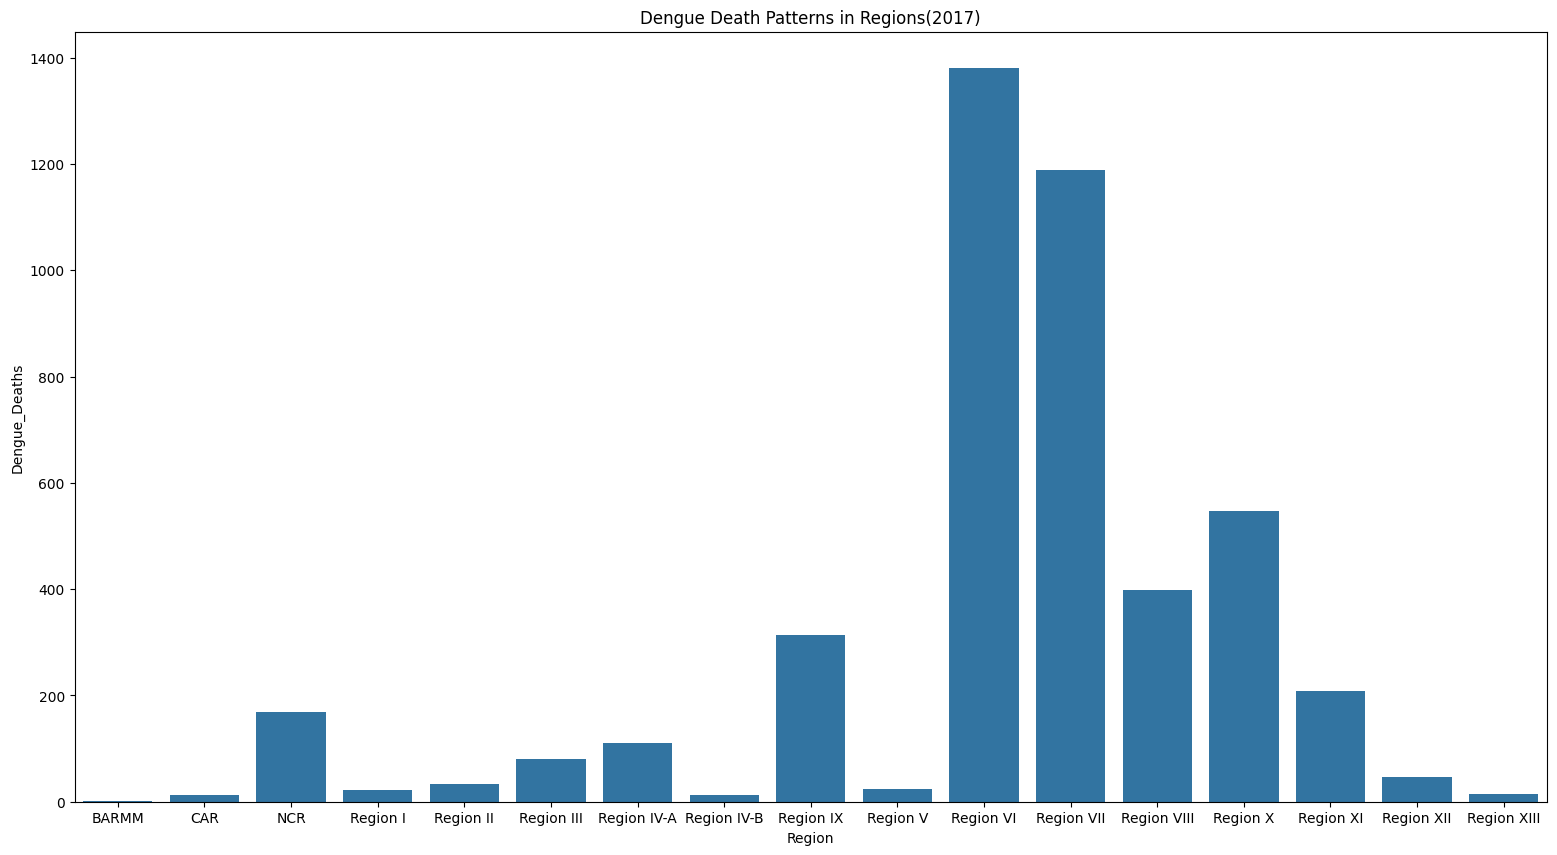

In [34]:
dengue17_Regions_Death_cases = dengue_2017.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=dengue17_Regions_Death_cases, x="Region", y="Dengue_Deaths")
plt.title('Dengue Death Patterns in Regions(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths by Region</h1>
<p><strong>Region VI:</strong> 1,380 deaths, contributing 19.81% of total dengue deaths.</p>
<p><strong>Region VII:</strong> 1,189 deaths, contributing 16.96% of total dengue deaths.</p>
<p><strong>NCR:</strong> 168 deaths, contributing 2.42% of total dengue deaths.</p>
<p><strong>Region X:</strong> 548 deaths, contributing 7.86% of total dengue deaths.</p>
<p><strong>Region IX:</strong> 313 deaths, contributing 4.44% of total dengue deaths.</p>
<p><strong>Region XIII:</strong> 14 deaths, contributing 0.20% of total dengue deaths.</p>
<p><strong>Region XI:</strong> 209 deaths, contributing 2.94% of total dengue deaths.</p>
<p><strong>Region III:</strong> 81 deaths, contributing 1.14% of total dengue deaths.</p>
<p><strong>Region IV-A:</strong> 110 deaths, contributing 1.54% of total dengue deaths.</p>
<p><strong>Region II:</strong> 34 deaths, contributing 0.48% of total dengue deaths.</p>
<p><strong>Region XII:</strong> 46 deaths, contributing 0.65% of total dengue deaths.</p>
<p><strong>Region I:</strong> 23 deaths, contributing 0.32% of total dengue deaths.</p>
<p><strong>Region IV-B:</strong> 12 deaths, contributing 0.17% of total dengue deaths.</p>
<p><strong>CAR:</strong> 12 deaths, contributing 0.17% of total dengue deaths.</p>
<p><strong>Region V:</strong> 24 deaths, contributing 0.34% of total dengue deaths.</p>
<p><strong>BARMM:</strong> 2 deaths, contributing 0.03% of total dengue deaths.</p>


<h1>Dengue Fatality Patterns in Different Regions</h1>

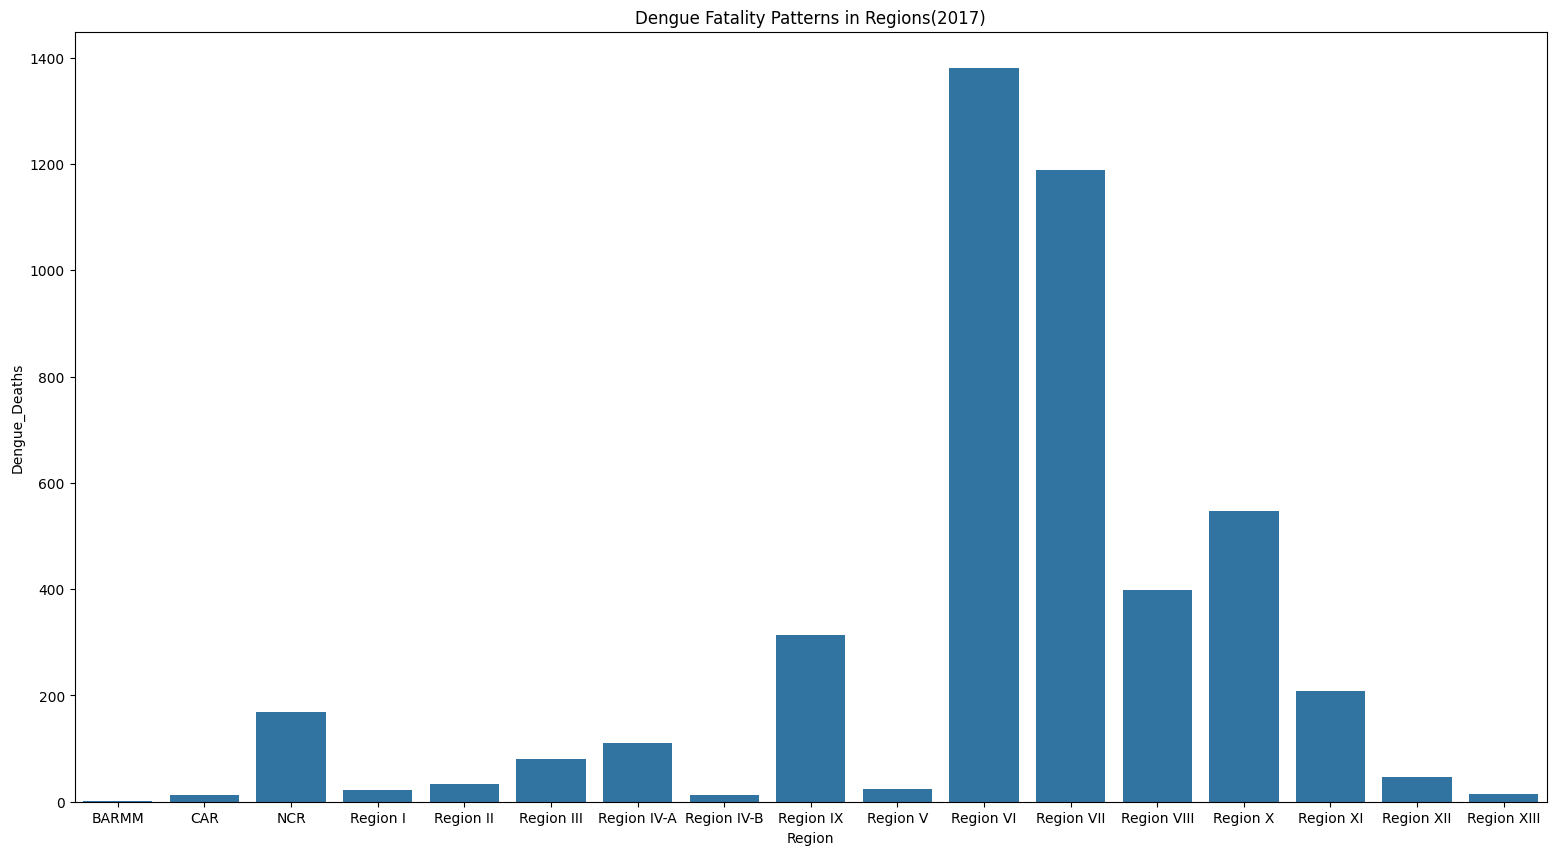

In [35]:
dengue17_Regions_Fatality = dengue_2017.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=dengue17_Regions_Fatality, x="Region", y="Dengue_Deaths")
plt.title('Dengue Fatality Patterns in Regions(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths by Region</h1>
<p><strong>Region VI:</strong> 1,380 deaths, contributing 19.81% of total dengue deaths.</p>
<p><strong>Region VII:</strong> 1,189 deaths, contributing 16.96% of total dengue deaths.</p>
<p><strong>Region X:</strong> 548 deaths, contributing 7.86% of total dengue deaths.</p>
<p><strong>Region IX:</strong> 313 deaths, contributing 4.44% of total dengue deaths.</p>
<p><strong>Region VIII:</strong> 398 deaths, contributing 5.58% of total dengue deaths.</p>
<p><strong>NCR:</strong> 168 deaths, contributing 2.42% of total dengue deaths.</p>
<p><strong>Region XI:</strong> 209 deaths, contributing 2.94% of total dengue deaths.</p>
<p><strong>Region IV-A:</strong> 110 deaths, contributing 1.54% of total dengue deaths.</p>
<p><strong>Region III:</strong> 81 deaths, contributing 1.14% of total dengue deaths.</p>
<p><strong>Region XII:</strong> 46 deaths, contributing 0.65% of total dengue deaths.</p>
<p><strong>Region II:</strong> 34 deaths, contributing 0.48% of total dengue deaths.</p>
<p><strong>Region I:</strong> 23 deaths, contributing 0.32% of total dengue deaths.</p>
<p><strong>Region V:</strong> 24 deaths, contributing 0.34% of total dengue deaths.</p>
<p><strong>Region XIII:</strong> 14 deaths, contributing 0.20% of total dengue deaths.</p>
<p><strong>Region IV-B:</strong> 12 deaths, contributing 0.17% of total dengue deaths.</p>
<p><strong>CAR:</strong> 12 deaths, contributing 0.17% of total dengue deaths.</p>
<p><strong>BARMM:</strong> 2 deaths, contributing 0.03% of total dengue deaths.</p>


<h1>Region 6 investigations</h1>

In [36]:
dengue_region_6 = dengue_2017[dengue_2017['Region'] == 'Region VI']

<h1>Region 6 Dengue Cases Patterns in Months</h1>

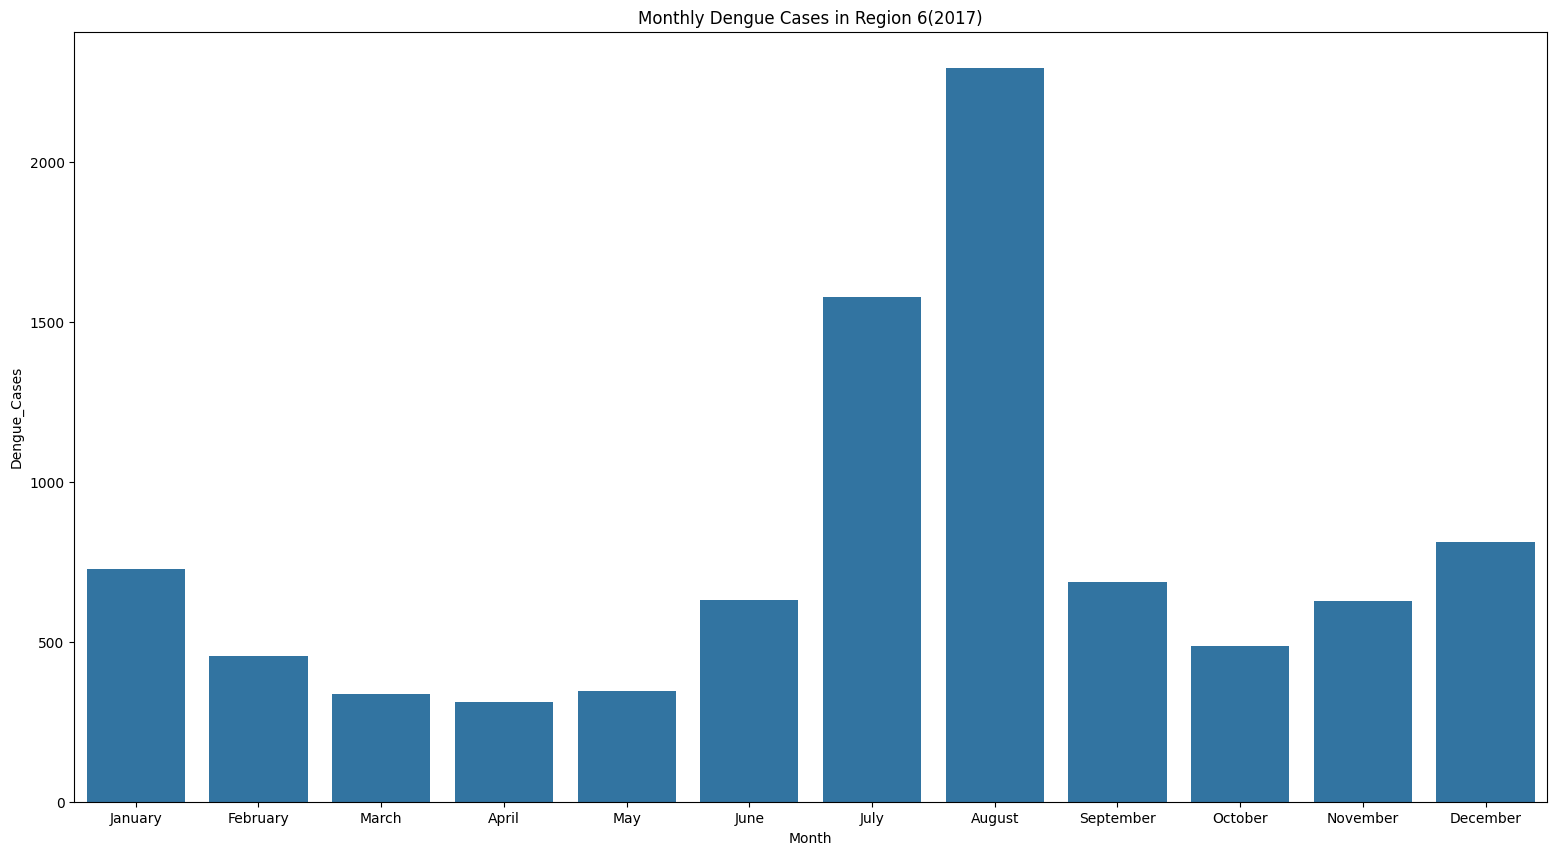

In [37]:
region6_Month_Cases = dengue_region_6.groupby('Month')['Dengue_Cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
region6_Month_Cases['Month'] = pd.Categorical(region6_Month_Cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=region6_Month_Cases, x="Month", y="Dengue_Cases")
plt.title('Monthly Dengue Cases in Region 6(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Cases by Month for Region VI</h1>
<p><strong>August:</strong> 2,291 cases, contributing 25.18% of total dengue cases for Region VI.</p>
<p><strong>July:</strong> 1,577 cases, contributing 17.51% of total dengue cases for Region VI.</p>
<p><strong>December:</strong> 811 cases, contributing 9.03% of total dengue cases for Region VI.</p>
<p><strong>September:</strong> 686 cases, contributing 7.68% of total dengue cases for Region VI.</p>
<p><strong>June:</strong> 630 cases, contributing 7.06% of total dengue cases for Region VI.</p>
<p><strong>November:</strong> 627 cases, contributing 7.04% of total dengue cases for Region VI.</p>
<p><strong>January:</strong> 727 cases, contributing 8.18% of total dengue cases for Region VI.</p>
<p><strong>May:</strong> 346 cases, contributing 3.91% of total dengue cases for Region VI.</p>
<p><strong>March:</strong> 336 cases, contributing 3.79% of total dengue cases for Region VI.</p>
<p><strong>October:</strong> 488 cases, contributing 5.52% of total dengue cases for Region VI.</p>
<p><strong>February:</strong> 454 cases, contributing 5.15% of total dengue cases for Region VI.</p>
<p><strong>April:</strong> 310 cases, contributing 3.51% of total dengue cases for Region VI.</p>


<h1>Region 6 Dengue Deaths Patterns in Months</h1>

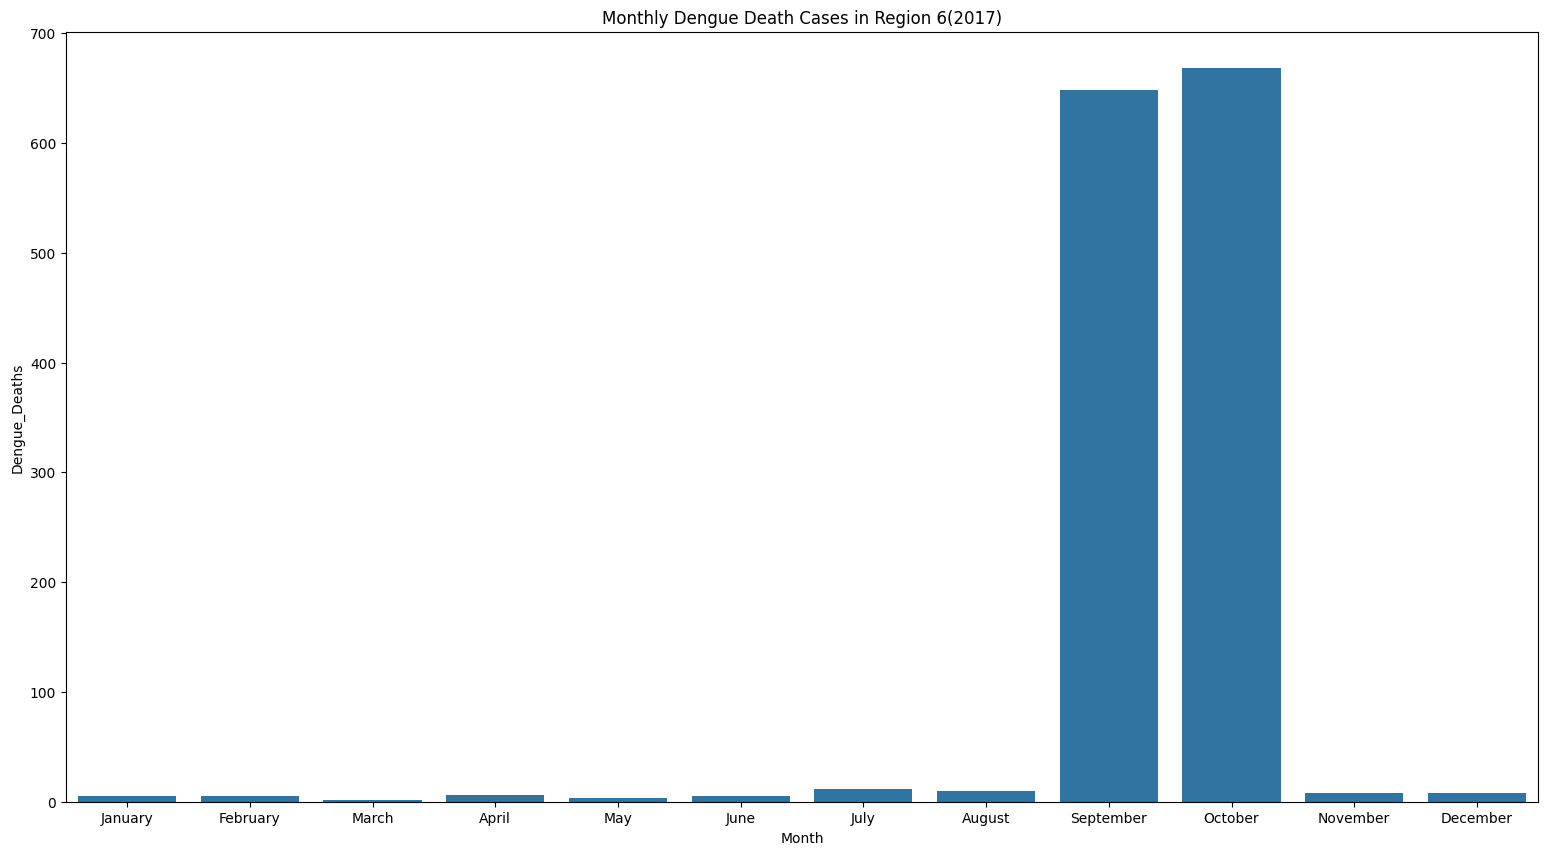

In [38]:
region6_Month_Deaths = dengue_region_6.groupby('Month')['Dengue_Deaths'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
region6_Month_Deaths['Month'] = pd.Categorical(region6_Month_Deaths['Month'], categories=month_order, ordered=True)

sns.barplot(data=region6_Month_Deaths, x="Month", y="Dengue_Deaths")
plt.title('Monthly Dengue Death Cases in Region 6(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths by Month for Region VI</h1>
<p><strong>October:</strong> 668 deaths, contributing 46.84% of total dengue deaths for Region VI.</p>
<p><strong>September:</strong> 648 deaths, contributing 45.60% of total dengue deaths for Region VI.</p>
<p><strong>July:</strong> 12 deaths, contributing 0.86% of total dengue deaths for Region VI.</p>
<p><strong>August:</strong> 10 deaths, contributing 0.71% of total dengue deaths for Region VI.</p>
<p><strong>December:</strong> 8 deaths, contributing 0.57% of total dengue deaths for Region VI.</p>
<p><strong>November:</strong> 8 deaths, contributing 0.57% of total dengue deaths for Region VI.</p>
<p><strong>April:</strong> 6 deaths, contributing 0.43% of total dengue deaths for Region VI.</p>
<p><strong>February:</strong> 5 deaths, contributing 0.36% of total dengue deaths for Region VI.</p>
<p><strong>January:</strong> 5 deaths, contributing 0.36% of total dengue deaths for Region VI.</p>
<p><strong>June:</strong> 5 deaths, contributing 0.36% of total dengue deaths for Region VI.</p>
<p><strong>May:</strong> 3 deaths, contributing 0.21% of total dengue deaths for Region VI.</p>
<p><strong>March:</strong> 2 deaths, contributing 0.14% of total dengue deaths for Region VI.</p>


<h1>Region 6 Dengue Fatality Patterns in Months</h1>

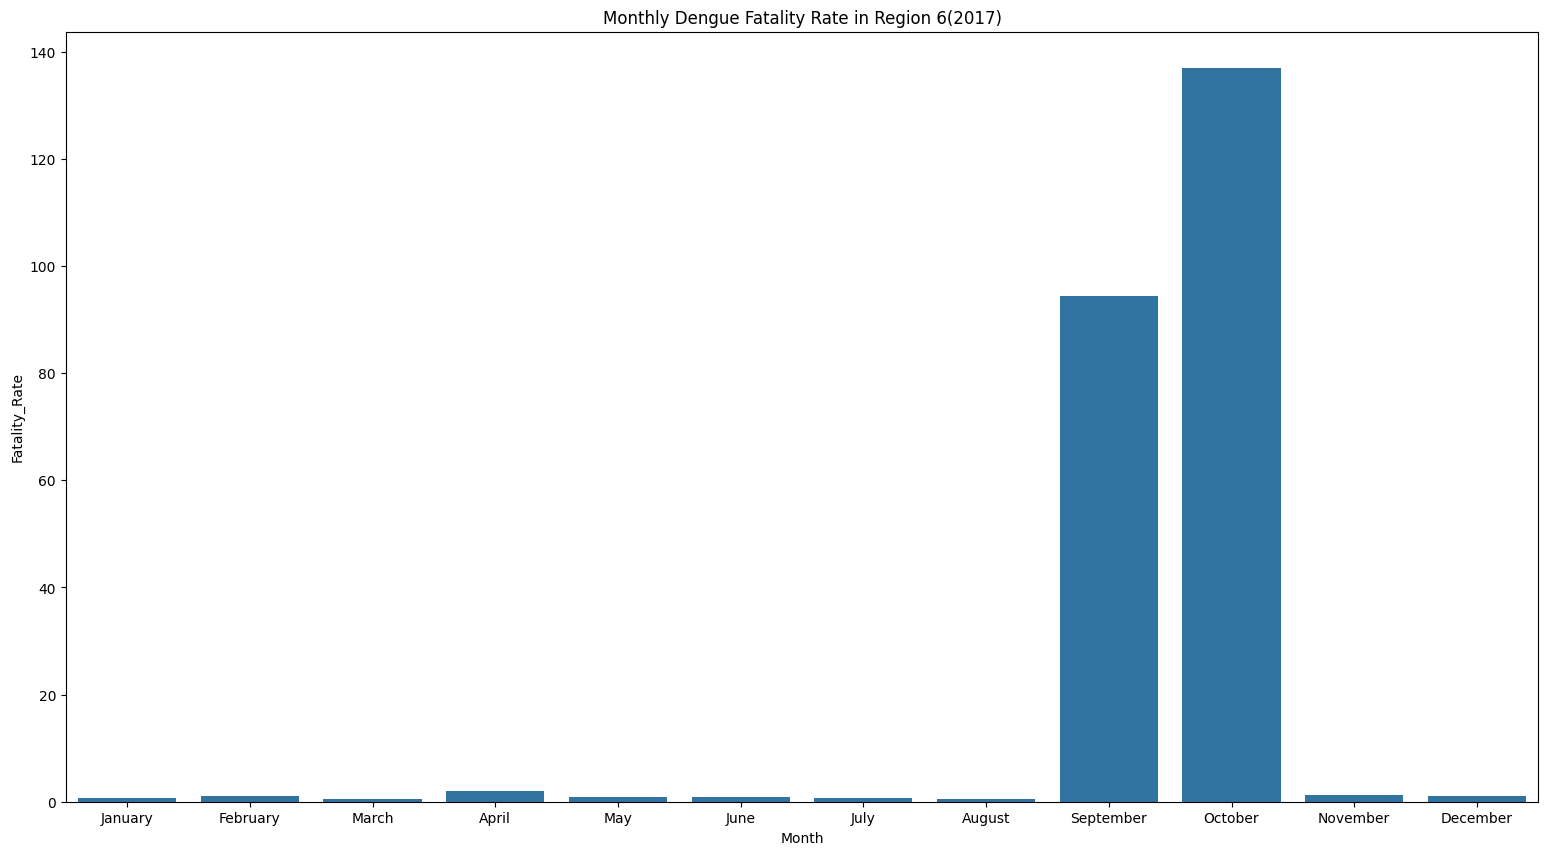

In [39]:
region6_Month_Fatality = dengue_region_6.groupby('Month')['Fatality_Rate'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
region6_Month_Fatality['Month'] = pd.Categorical(region6_Month_Fatality['Month'], categories=month_order, ordered=True)

sns.barplot(data=region6_Month_Fatality, x="Month", y="Fatality_Rate")
plt.title('Monthly Dengue Fatality Rate in Region 6(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Fatality Rate by Month for Region VI</h1>
<p><strong>October:</strong> 136.89%, contributing 46.32% of total fatality rate for Region VI.</p>
<p><strong>September:</strong> 94.46%, contributing 33.21% of total fatality rate for Region VI.</p>
<p><strong>November:</strong> 1.28%, contributing 0.45% of total fatality rate for Region VI.</p>
<p><strong>April:</strong> 1.94%, contributing 0.68% of total fatality rate for Region VI.</p>
<p><strong>February:</strong> 1.10%, contributing 0.39% of total fatality rate for Region VI.</p>
<p><strong>December:</strong> 0.99%, contributing 0.35% of total fatality rate for Region VI.</p>
<p><strong>May:</strong> 0.87%, contributing 0.31% of total fatality rate for Region VI.</p>
<p><strong>June:</strong> 0.79%, contributing 0.28% of total fatality rate for Region VI.</p>
<p><strong>July:</strong> 0.76%, contributing 0.27% of total fatality rate for Region VI.</p>
<p><strong>January:</strong> 0.69%, contributing 0.25% of total fatality rate for Region VI.</p>
<p><strong>March:</strong> 0.60%, contributing 0.21% of total fatality rate for Region VI.</p>
<p><strong>August:</strong> 0.44%, contributing 0.16% of total fatality rate for Region VI.</p>


<h1 style='font-size: 64px'>2016 Exploration</h1>
<h1>Prompted by the high Case and Fatality rate, I conducted a deeper investigation.</h1>

In [40]:
# dengue_2016

<h1>Dengue Case Patterns Across 2016</h1>

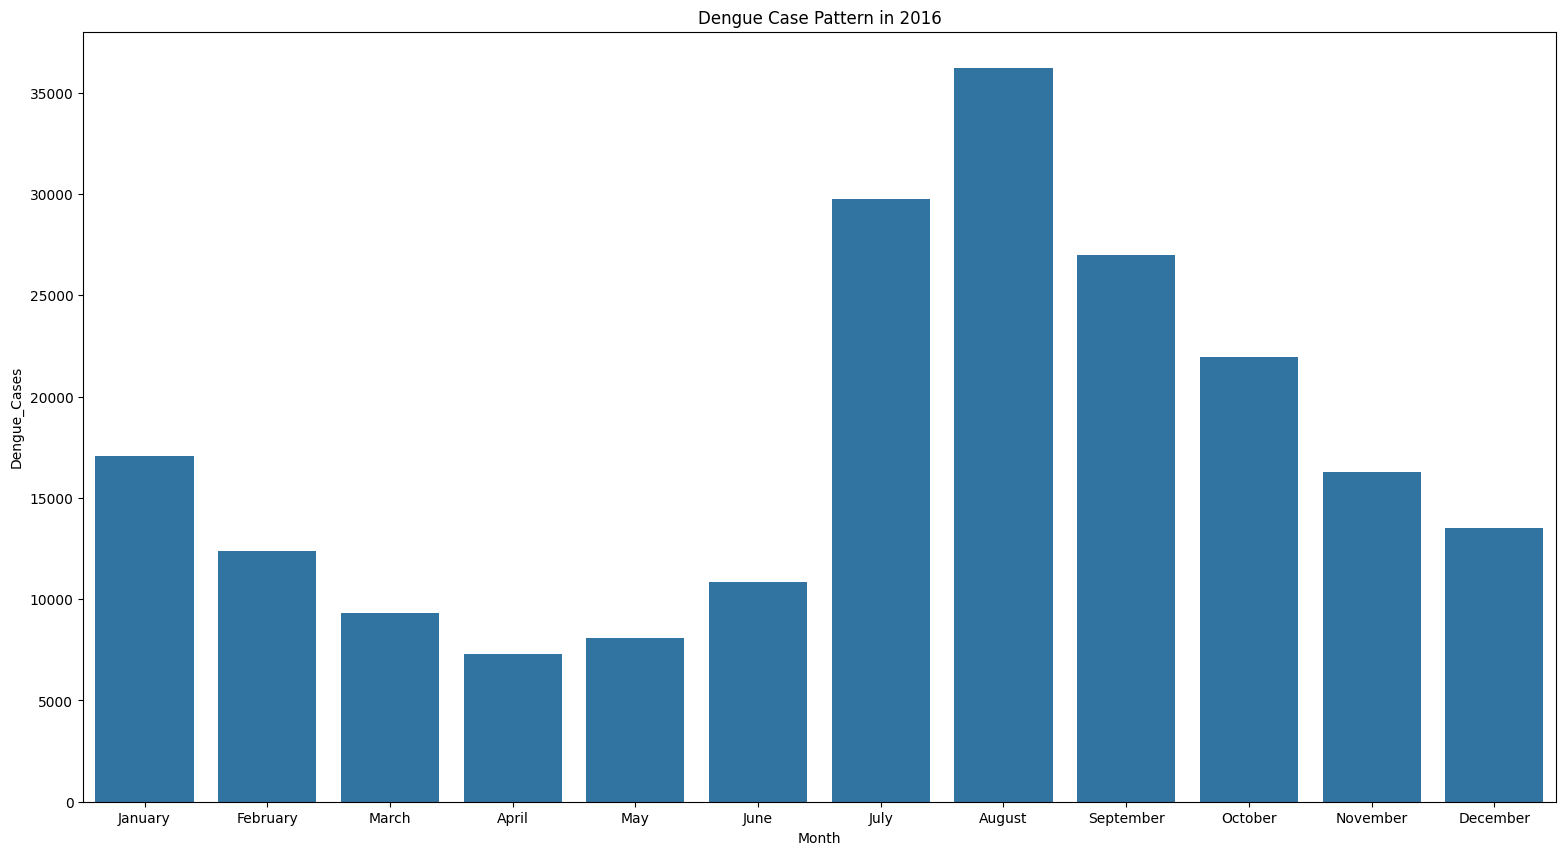

In [41]:
dengue2016_Cases = dengue_2016.groupby('Month')['Dengue_Cases'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue2016_Cases['Month'] = pd.Categorical(dengue2016_Cases['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue2016_Cases, x="Month", y="Dengue_Cases")
plt.title('Dengue Case Pattern in 2016')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Cases by Month for 2016</h1>
<p><strong>August:</strong> 36,195 cases, contributing 15.83% of total dengue cases in 2016.</p>
<p><strong>July:</strong> 29,744 cases, contributing 12.82% of total dengue cases in 2016.</p>
<p><strong>September:</strong> 26,990 cases, contributing 11.47% of total dengue cases in 2016.</p>
<p><strong>October:</strong> 21,943 cases, contributing 9.34% of total dengue cases in 2016.</p>
<p><strong>December:</strong> 13,490 cases, contributing 5.75% of total dengue cases in 2016.</p>
<p><strong>January:</strong> 17,052 cases, contributing 7.22% of total dengue cases in 2016.</p>
<p><strong>February:</strong> 12,386 cases, contributing 5.23% of total dengue cases in 2016.</p>
<p><strong>November:</strong> 16,252 cases, contributing 6.81% of total dengue cases in 2016.</p>
<p><strong>March:</strong> 9,300 cases, contributing 3.95% of total dengue cases in 2016.</p>
<p><strong>June:</strong> 10,831 cases, contributing 4.53% of total dengue cases in 2016.</p>
<p><strong>May:</strong> 8,092 cases, contributing 3.41% of total dengue cases in 2016.</p>
<p><strong>April:</strong> 7,269 cases, contributing 3.04% of total dengue cases in 2016.</p>


<h1>Dengue Death Patterns Across 2017</h1>

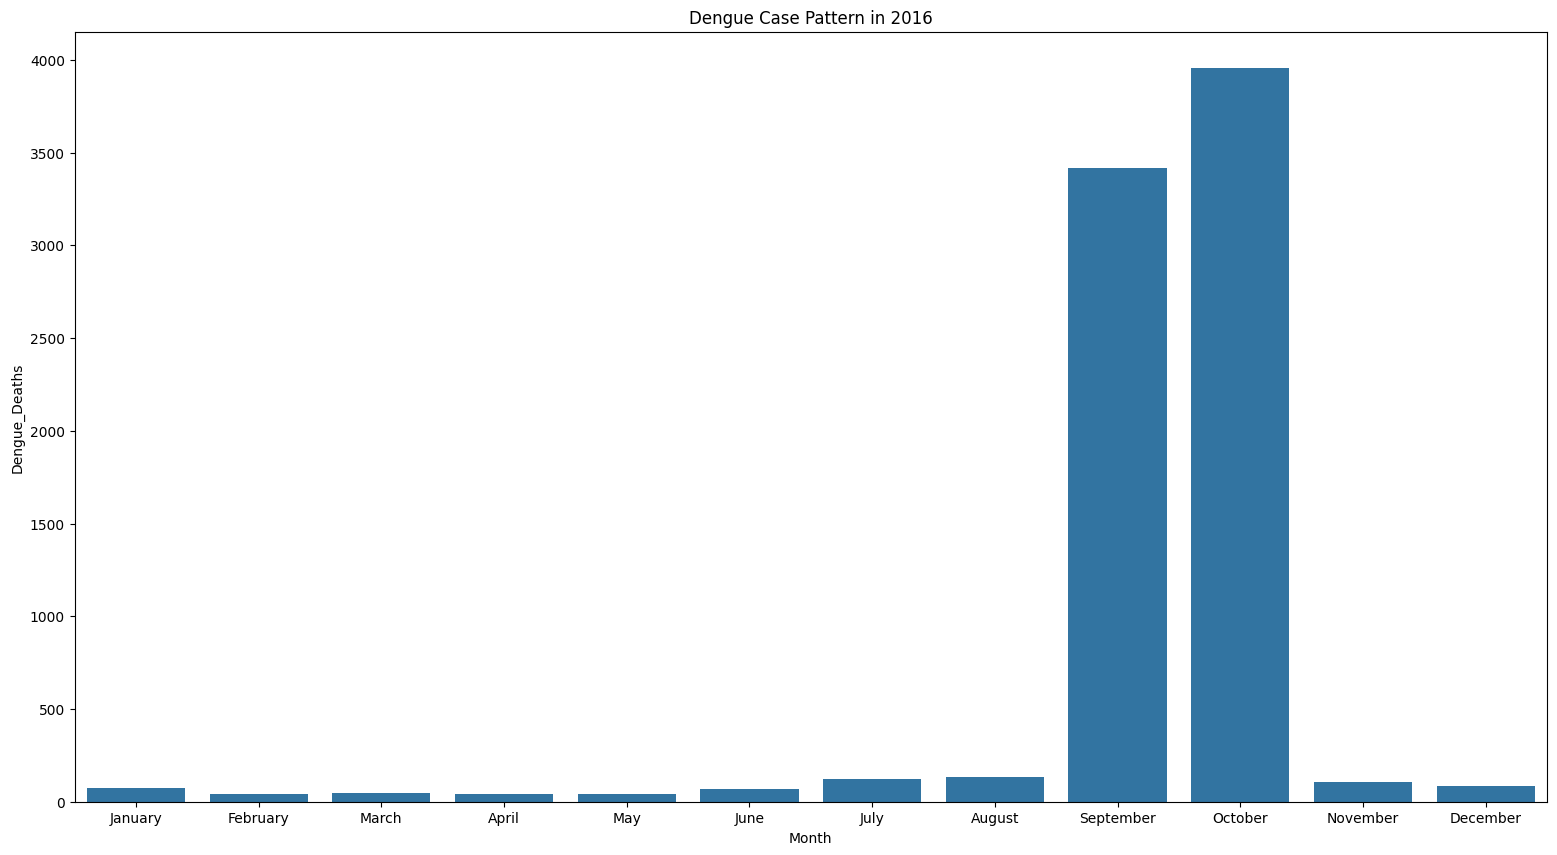

In [42]:
dengue2016_death = dengue_2016.groupby('Month')['Dengue_Deaths'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue2016_death['Month'] = pd.Categorical(dengue2016_death['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue2016_death, x="Month", y="Dengue_Deaths")
plt.title('Dengue Case Pattern in 2016')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths by Month for 2016</h1>
<p><strong>October:</strong> 3,954 deaths, contributing 53.36% of total dengue deaths in 2016.</p>
<p><strong>September:</strong> 3,418 deaths, contributing 46.12% of total dengue deaths in 2016.</p>
<p><strong>August:</strong> 132 deaths, contributing 1.79% of total dengue deaths in 2016.</p>
<p><strong>July:</strong> 123 deaths, contributing 1.64% of total dengue deaths in 2016.</p>
<p><strong>November:</strong> 104 deaths, contributing 1.40% of total dengue deaths in 2016.</p>
<p><strong>December:</strong> 83 deaths, contributing 1.11% of total dengue deaths in 2016.</p>
<p><strong>January:</strong> 73 deaths, contributing 0.97% of total dengue deaths in 2016.</p>
<p><strong>June:</strong> 69 deaths, contributing 0.92% of total dengue deaths in 2016.</p>
<p><strong>March:</strong> 47 deaths, contributing 0.62% of total dengue deaths in 2016.</p>
<p><strong>February:</strong> 43 deaths, contributing 0.57% of total dengue deaths in 2016.</p>
<p><strong>May:</strong> 41 deaths, contributing 0.54% of total dengue deaths in 2016.</p>
<p><strong>April:</strong> 40 deaths, contributing 0.53% of total dengue deaths in 2016.</p>


<h1>Dengue Death Patterns Across 2016</h1>

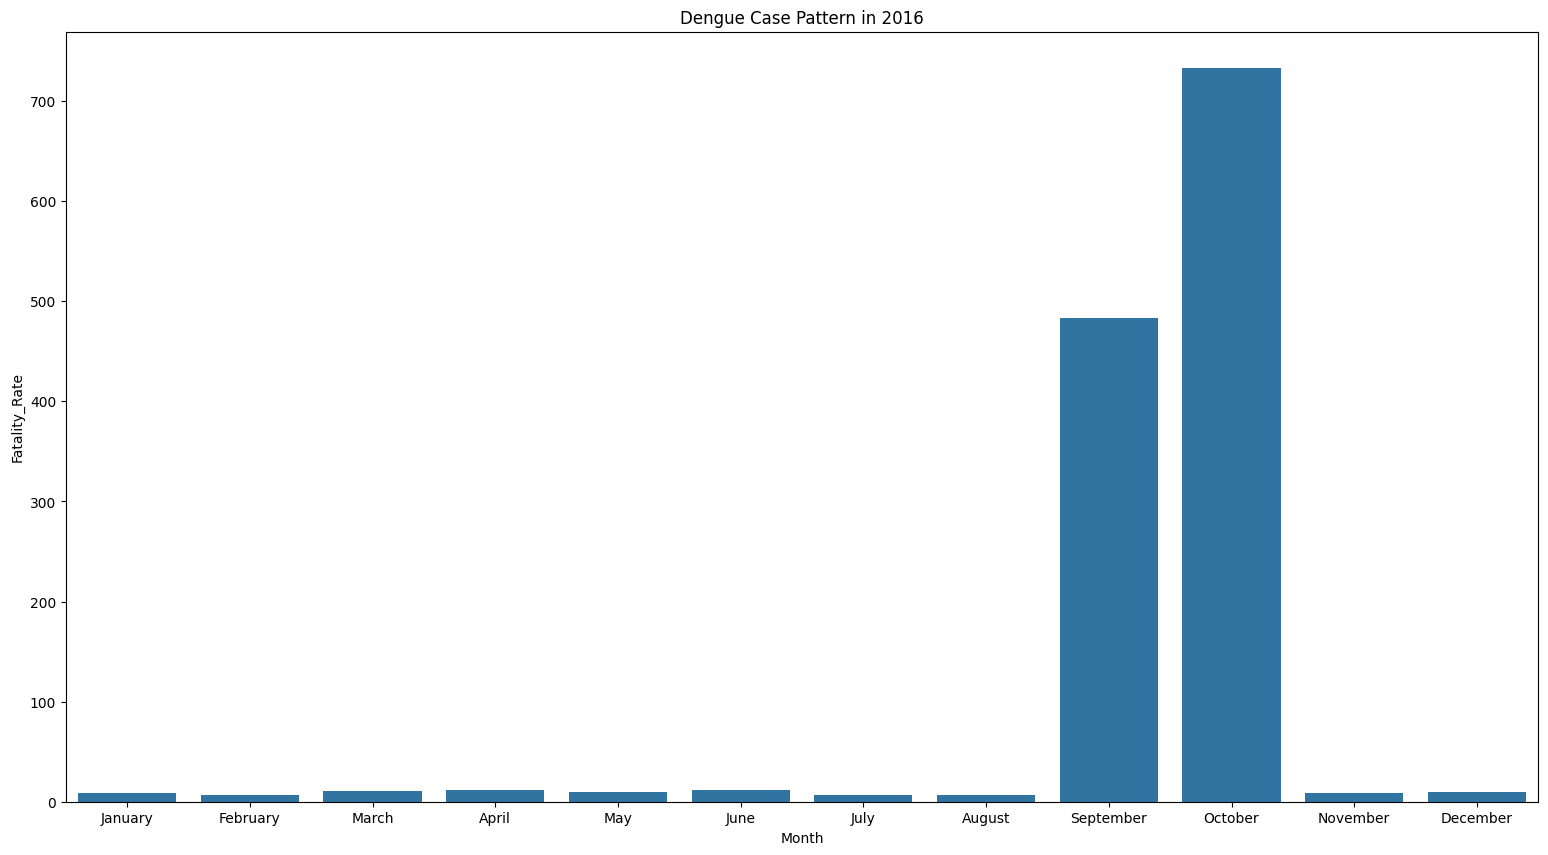

In [43]:
dengue2016_fatality = dengue_2016.groupby('Month')['Fatality_Rate'].sum().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue2016_fatality['Month'] = pd.Categorical(dengue2016_fatality['Month'], categories=month_order, ordered=True)

sns.barplot(data=dengue2016_fatality, x="Month", y="Fatality_Rate")
plt.title('Dengue Case Pattern in 2016')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Fatality Rate by Month for 2016</h1>
<p><strong>October:</strong> 732.72%, contributing 32.63% of total fatality rate for 2016.</p>
<p><strong>September:</strong> 482.99%, contributing 21.05% of total fatality rate for 2016.</p>
<p><strong>June:</strong> 11.76%, contributing 0.51% of total fatality rate for 2016.</p>
<p><strong>April:</strong> 11.39%, contributing 0.49% of total fatality rate for 2016.</p>
<p><strong>December:</strong> 9.49%, contributing 0.41% of total fatality rate for 2016.</p>
<p><strong>March:</strong> 10.71%, contributing 0.46% of total fatality rate for 2016.</p>
<p><strong>May:</strong> 10.12%, contributing 0.43% of total fatality rate for 2016.</p>
<p><strong>January:</strong> 8.34%, contributing 0.36% of total fatality rate for 2016.</p>
<p><strong>November:</strong> 8.62%, contributing 0.37% of total fatality rate for 2016.</p>
<p><strong>July:</strong> 7.10%, contributing 0.31% of total fatality rate for 2016.</p>
<p><strong>February:</strong> 7.00%, contributing 0.30% of total fatality rate for 2016.</p>
<p><strong>August:</strong> 6.73%, contributing 0.29% of total fatality rate for 2016.</p>


<h1>Dengue Case Patterns Across the Regions(2016)</h1>

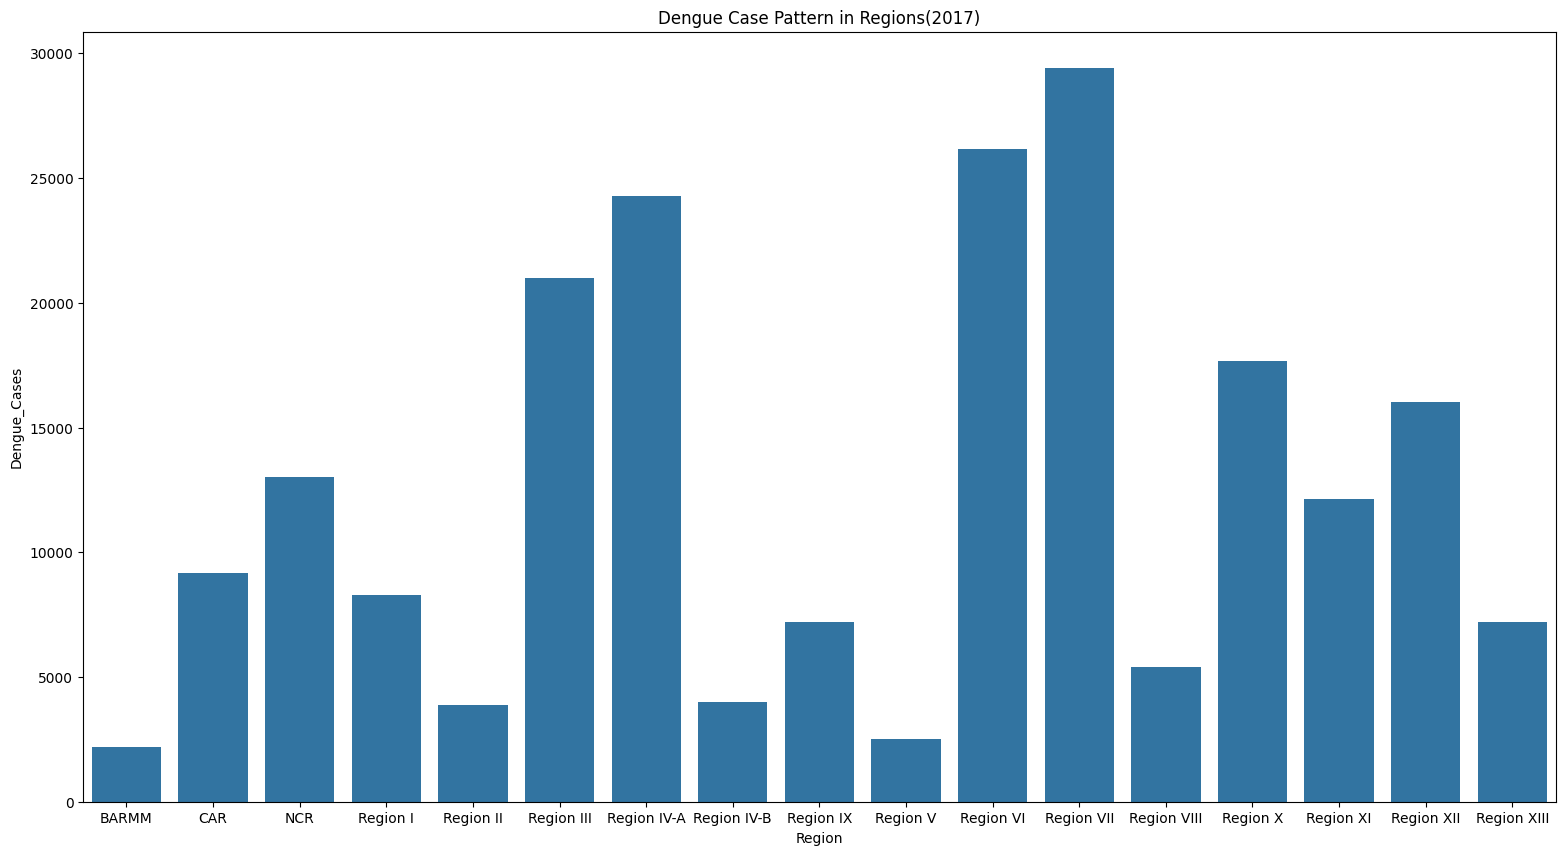

In [44]:
dengue2016_regions_case = dengue_2016.groupby('Region')['Dengue_Cases'].sum().reset_index()

sns.barplot(data=dengue2016_regions_case, x="Region", y="Dengue_Cases")
plt.title('Dengue Case Pattern in Regions(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Cases by Region for 2016</h1>
<p><strong>Region VII:</strong> 29,395 cases, contributing 13.43% of total dengue cases in 2016.</p>
<p><strong>Region VI:</strong> 26,170 cases, contributing 11.85% of total dengue cases in 2016.</p>
<p><strong>Region III:</strong> 20,989 cases, contributing 9.34% of total dengue cases in 2016.</p>
<p><strong>Region IV-A:</strong> 24,282 cases, contributing 10.88% of total dengue cases in 2016.</p>
<p><strong>Region XII:</strong> 16,013 cases, contributing 7.23% of total dengue cases in 2016.</p>
<p><strong>Region X:</strong> 17,680 cases, contributing 7.96% of total dengue cases in 2016.</p>
<p><strong>NCR:</strong> 13,002 cases, contributing 5.86% of total dengue cases in 2016.</p>
<p><strong>Region I:</strong> 8,281 cases, contributing 3.70% of total dengue cases in 2016.</p>
<p><strong>Region CAR:</strong> 9,164 cases, contributing 4.12% of total dengue cases in 2016.</p>
<p><strong>Region XIII:</strong> 7,215 cases, contributing 3.23% of total dengue cases in 2016.</p>
<p><strong>Region IX:</strong> 7,215 cases, contributing 3.23% of total dengue cases in 2016.</p>
<p><strong>Region VIII:</strong> 5,388 cases, contributing 2.41% of total dengue cases in 2016.</p>
<p><strong>Region II:</strong> 3,891 cases, contributing 1.73% of total dengue cases in 2016.</p>
<p><strong>Region IV-B:</strong> 3,999 cases, contributing 1.80% of total dengue cases in 2016.</p>
<p><strong>Region V:</strong> 2,532 cases, contributing 1.12% of total dengue cases in 2016.</p>
<p><strong>BARMM:</strong> 2,191 cases, contributing 0.97% of total dengue cases in 2016.</p>


<h1>Dengue Death Patterns Across the Regions(2016)</h1>

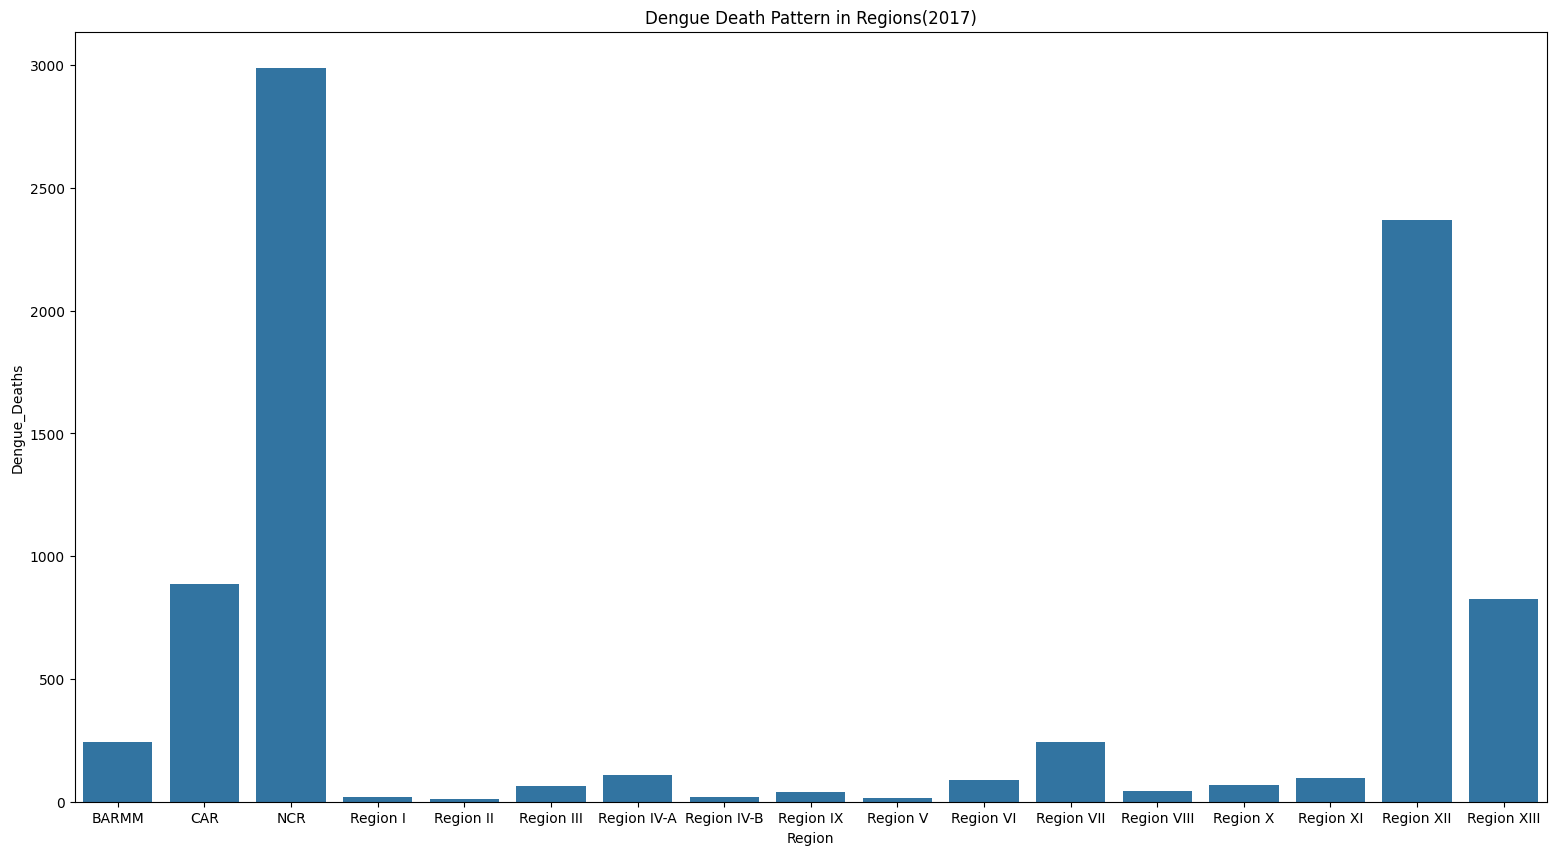

In [45]:
dengue2016_regions_death = dengue_2016.groupby('Region')['Dengue_Deaths'].sum().reset_index()

sns.barplot(data=dengue2016_regions_death, x="Region", y="Dengue_Deaths")
plt.title('Dengue Death Pattern in Regions(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Deaths by Region for 2016</h1>
<p><strong>NCR:</strong> 2,987 deaths, contributing 34.23% of total dengue deaths in 2016.</p>
<p><strong>Region XII:</strong> 2,369 deaths, contributing 27.47% of total dengue deaths in 2016.</p>
<p><strong>Region XIII:</strong> 824 deaths, contributing 9.56% of total dengue deaths in 2016.</p>
<p><strong>CAR:</strong> 888 deaths, contributing 10.27% of total dengue deaths in 2016.</p>
<p><strong>Region VII:</strong> 243 deaths, contributing 2.82% of total dengue deaths in 2016.</p>
<p><strong>BARMM:</strong> 243 deaths, contributing 2.82% of total dengue deaths in 2016.</p>
<p><strong>Region X:</strong> 69 deaths, contributing 0.80% of total dengue deaths in 2016.</p>
<p><strong>Region VI:</strong> 87 deaths, contributing 1.02% of total dengue deaths in 2016.</p>
<p><strong>Region VIII:</strong> 42 deaths, contributing 0.49% of total dengue deaths in 2016.</p>
<p><strong>Region IX:</strong> 41 deaths, contributing 0.48% of total dengue deaths in 2016.</p>
<p><strong>Region IV-A:</strong> 108 deaths, contributing 1.26% of total dengue deaths in 2016.</p>
<p><strong>Region III:</strong> 65 deaths, contributing 0.76% of total dengue deaths in 2016.</p>
<p><strong>Region I:</strong> 21 deaths, contributing 0.25% of total dengue deaths in 2016.</p>
<p><strong>Region IV-B:</strong> 18 deaths, contributing 0.21% of total dengue deaths in 2016.</p>
<p><strong>Region V:</strong> 16 deaths, contributing 0.19% of total dengue deaths in 2016.</p>
<p><strong>Region II:</strong> 11 deaths, contributing 0.13% of total dengue deaths in 2016.</p>


<h1>Dengue Fatality Patterns Across the Regions(2016)</h1>

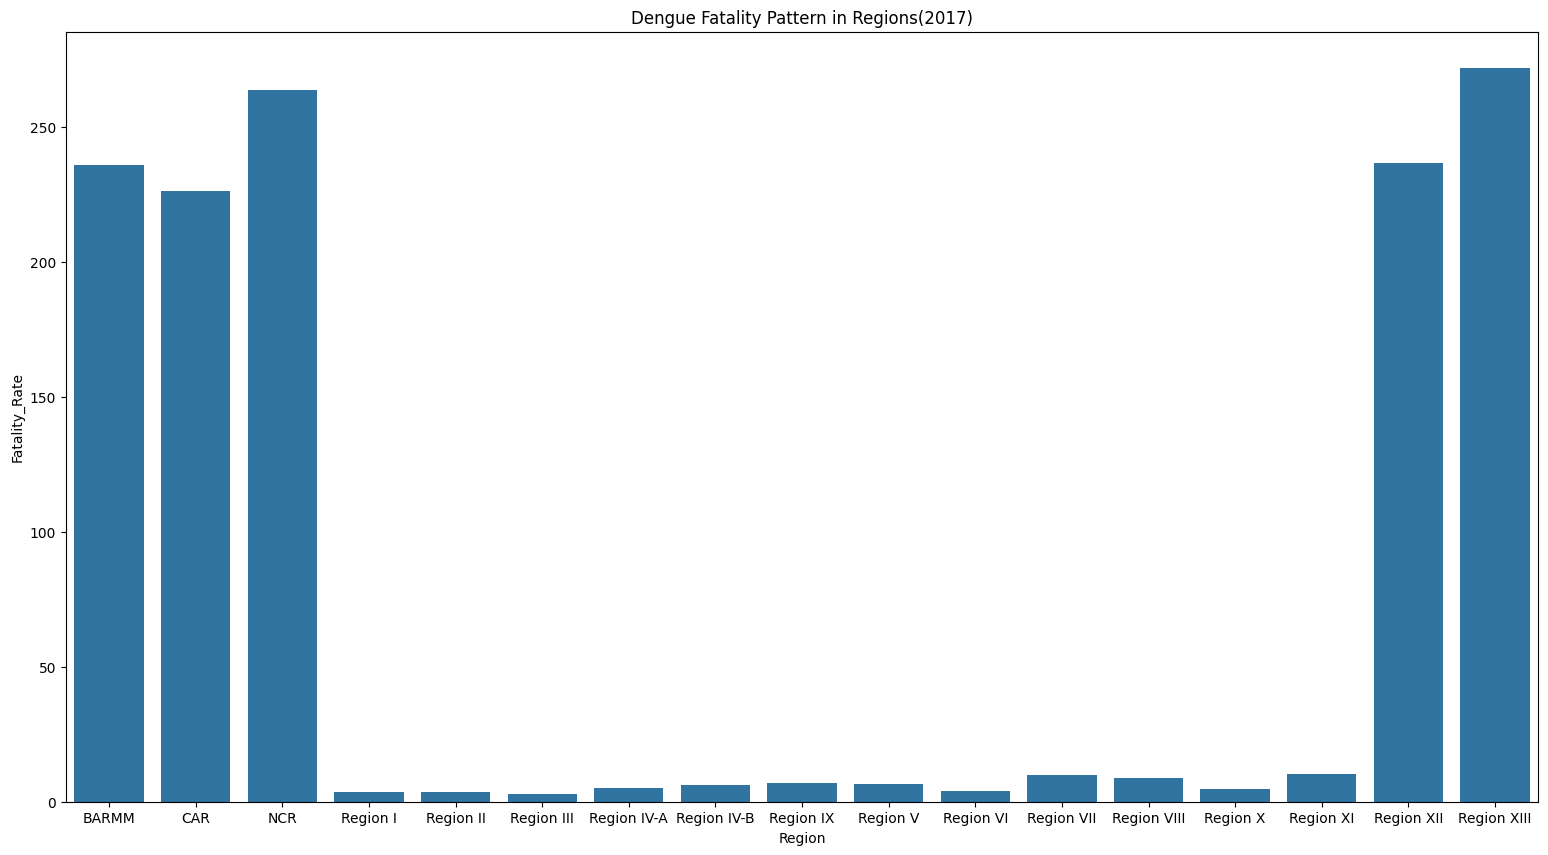

In [46]:
dengue2016_regions_fatality = dengue_2016.groupby('Region')['Fatality_Rate'].sum().reset_index()

sns.barplot(data=dengue2016_regions_fatality, x="Region", y="Fatality_Rate")
plt.title('Dengue Fatality Pattern in Regions(2017)')
plt.gcf().set_size_inches(19, 10) 
plt.show()

<h1>Dengue Fatality Rate by Region for 2016</h1>
<p><strong>Region XIII:</strong> 271.86% fatality rate, contributing the highest fatality rate in 2016.</p>
<p><strong>NCR:</strong> 263.67% fatality rate, contributing one of the highest fatality rates in 2016.</p>
<p><strong>Region XII:</strong> 236.85% fatality rate, contributing a significant fatality rate in 2016.</p>
<p><strong>BARMM:</strong> 235.88% fatality rate, contributing a high fatality rate in 2016.</p>
<p><strong>CAR:</strong> 226.25% fatality rate, contributing a high fatality rate in 2016.</p>
<p><strong>Region XI:</strong> 10.28% fatality rate, contributing to the higher fatality rate in 2016.</p>
<p><strong>Region VII:</strong> 10.01% fatality rate, contributing a significant fatality rate in 2016.</p>
<p><strong>Region VIII:</strong> 8.86% fatality rate, contributing a notable fatality rate in 2016.</p>
<p><strong>Region IV-B:</strong> 6.34% fatality rate, contributing a moderate fatality rate in 2016.</p>
<p><strong>Region IX:</strong> 6.96% fatality rate, contributing a moderate fatality rate in 2016.</p>
<p><strong>Region V:</strong> 6.65% fatality rate, contributing a moderate fatality rate in 2016.</p>
<p><strong>Region X:</strong> 4.57% fatality rate, contributing a moderate fatality rate in 2016.</p>
<p><strong>Region IV-A:</strong> 4.98% fatality rate, contributing a moderate fatality rate in 2016.</p>
<p><strong>Region I:</strong> 3.44% fatality rate, contributing a lower fatality rate in 2016.</p>
<p><strong>Region II:</strong> 3.60% fatality rate, contributing a lower fatality rate in 2016.</p>
<p><strong>Region III:</strong> 2.92% fatality rate, contributing the lowest fatality rate in 2016.</p>


In [47]:
# dengue["Cases_Growth"] = dengue["Dengue_Cases"].pct_change() * 100
# dengue["Deaths_Growth"] = dengue["Dengue_Deaths"].pct_change() * 100

In [48]:
# dengue["Cases_Growth"]

In [49]:
# dengue["Deaths_Growth"].unique()